<a href="https://colab.research.google.com/github/Rahulhipparkar39667/Sales-Data-Forecasting/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 6)

# Importing Dataset

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 8.10MB/s]


In [ ]:
df=pd.read_excel('mobilesales.xlsx')
df

DATE    Sales
0   2001-01-01   6519.0
1   2001-02-01   6654.0
2   2001-03-01   7332.0
3   2001-04-01   7332.0
4   2001-05-01   8240.0
..         ...      ...
212 2018-09-01  13838.0
213 2018-10-01  15351.0
214 2018-11-01  15615.0
215 2018-12-01  16941.0
216 2019-01-01  12160.0

[217 rows x 2 columns]

# Basic Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
df.describe().T

count                           mean                  min  \
DATE     217  2009-12-31 04:25:26.267281152  2001-01-01 00:00:00   
Sales  198.0                   10842.757576                108.0   

                       25%                  50%                  75%  \
DATE   2005-07-01 00:00:00  2010-01-01 00:00:00  2014-07-01 00:00:00   
Sales               8856.0              10745.0             12399.75   

                       max          std  
DATE   2019-01-01 00:00:00          NaN  
Sales              23740.0  2605.006293

In [ ]:
df.set_index('DATE',inplace=True)
df

Sales
DATE               
2001-01-01   6519.0
2001-02-01   6654.0
2001-03-01   7332.0
2001-04-01   7332.0
2001-05-01   8240.0
...             ...
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  16941.0
2019-01-01  12160.0

[217 rows x 1 columns]

In [ ]:
df.describe().T

count          mean          std    min     25%      50%       75%  \
Sales  198.0  10842.757576  2605.006293  108.0  8856.0  10745.0  12399.75   

           max  
Sales  23740.0

# Handling Missing Values

In [ ]:
df.isna().sum()

Sales    19
dtype: int64

## Using mean/ median

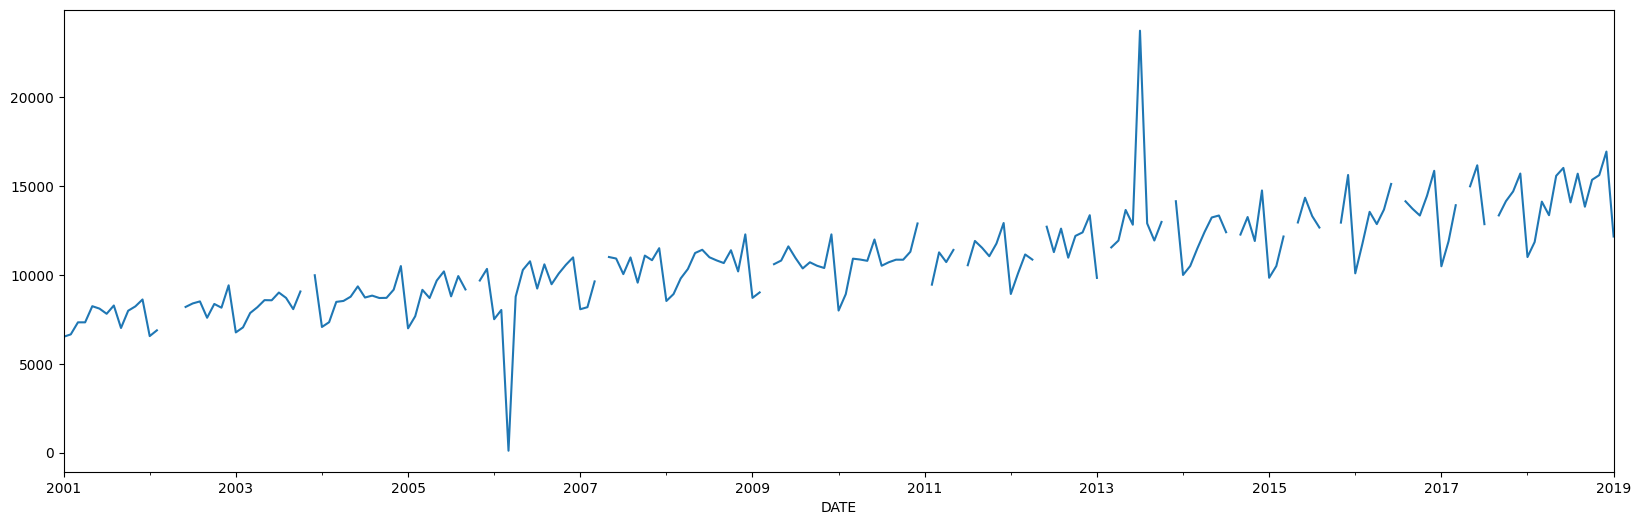

In [ ]:
df['Sales'].plot()
plt.show()

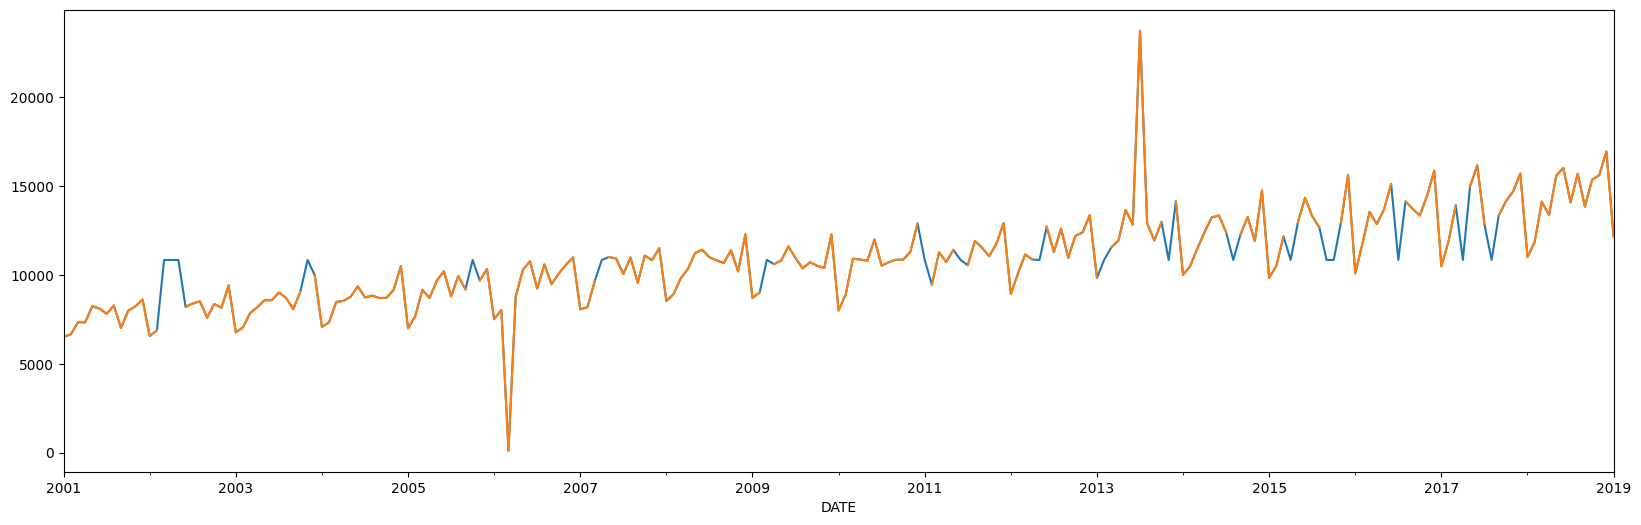

In [ ]:
df['Sales'].fillna(df['Sales'].mean()).plot(label='Imputed')
df['Sales'].plot(label='Original')
plt.show()

Using mean/median to impute missing values in times series is not a good method because imputed values may be different from local neighbors.

## Interplolation Method

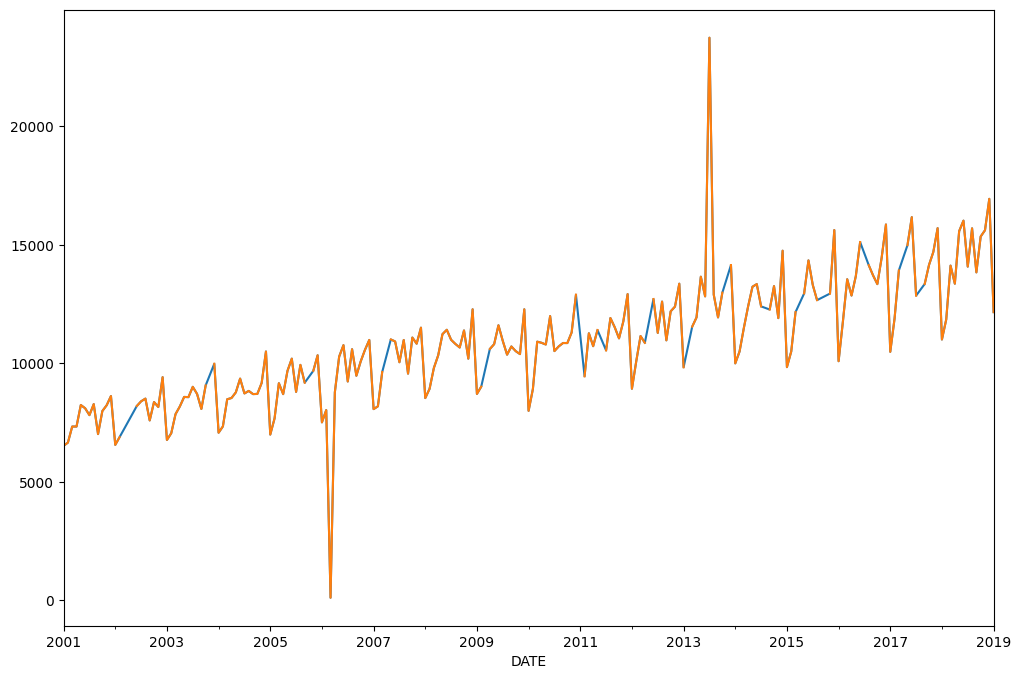

In [ ]:
plt.figure(figsize=(12,8))
df['Sales'].interpolate(method='linear').plot(label='Imputed')
df['Sales'].plot(label='Original')
plt.show()

In [ ]:
df['Sales']=df['Sales'].interpolate(method='linear')

# Handling Outliers

Why outliers are challenge?

outliers are one time event  or rare or may not like to repeat in future hence keeping these value may affect my model as my model may get biased towards that value . Removing is best approach.

## Visualizing Outliers

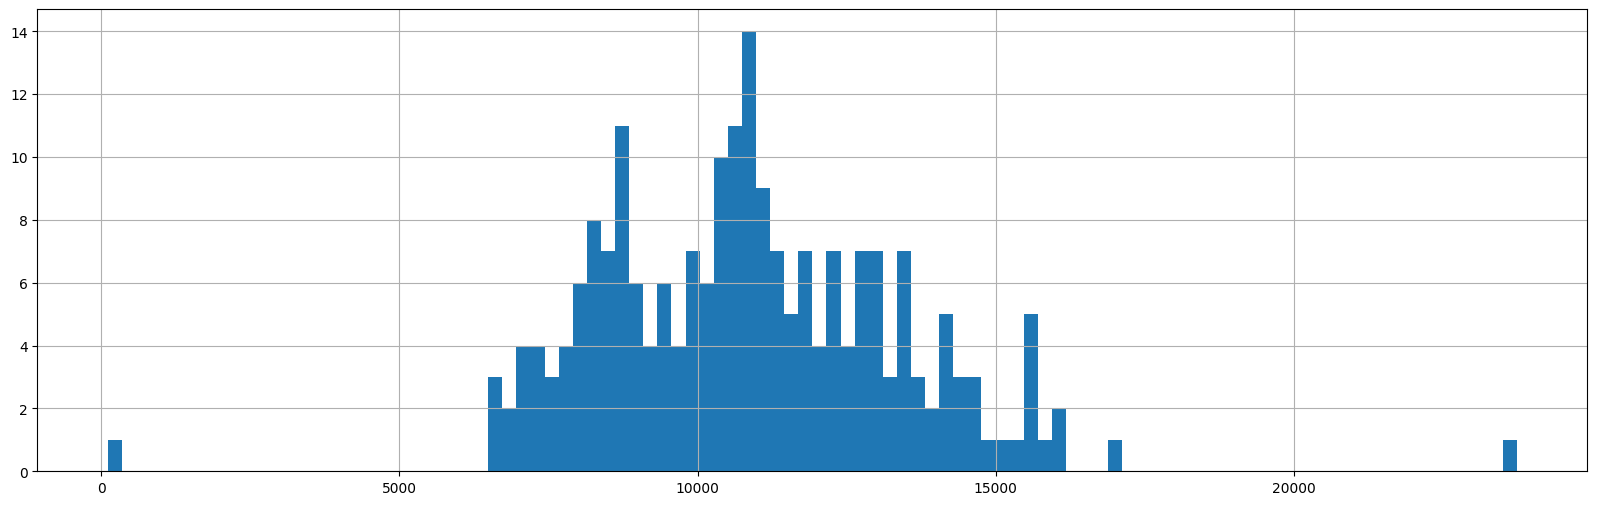

In [ ]:
df['Sales'].hist(bins=100).plot
plt.show()

<Axes: xlabel='DATE'>

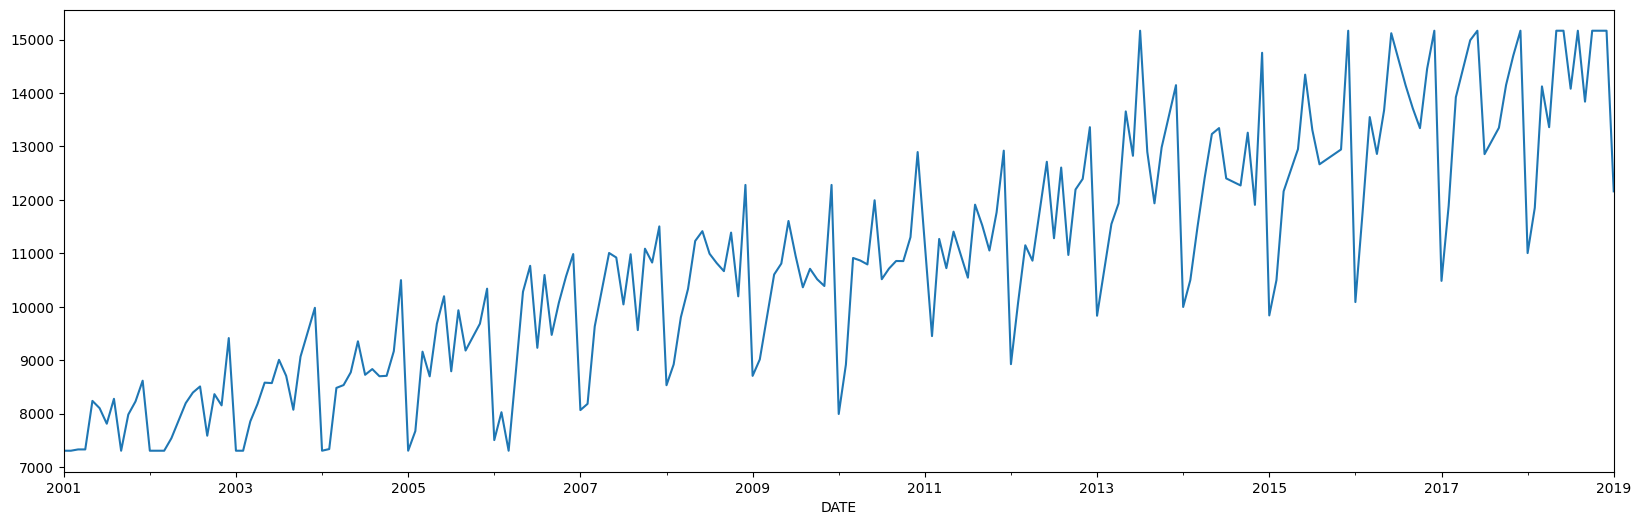

In [ ]:
df['Sales'].clip(upper=df['Sales'].quantile(0.95),lower=df['Sales'].quantile(0.05)).plot()

<bound method Axes.plot of <Axes: >>

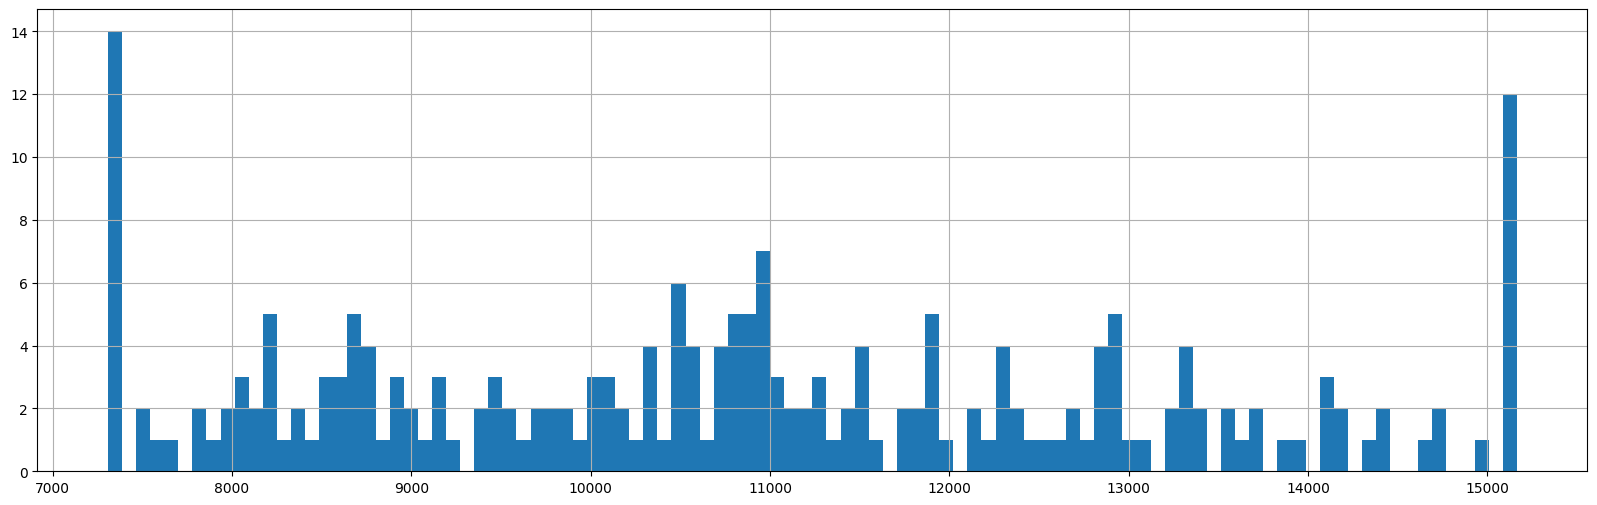

In [ ]:
df['Sales']=df['Sales'].clip(upper=df['Sales'].quantile(0.95),lower=df['Sales'].quantile(0.05))
df['Sales'].hist(bins=100).plot

- It may clip useful data.
- How do we prevent this ?
    - change percentile - (98,2)
- Keep quantile symmetric

# Moving Average

- Average of last k data points used to predict next data point
- Window size ---> Hyperparameter ----> no of data points to be considered for moving ---->  determines smoothness of moving  average curve.


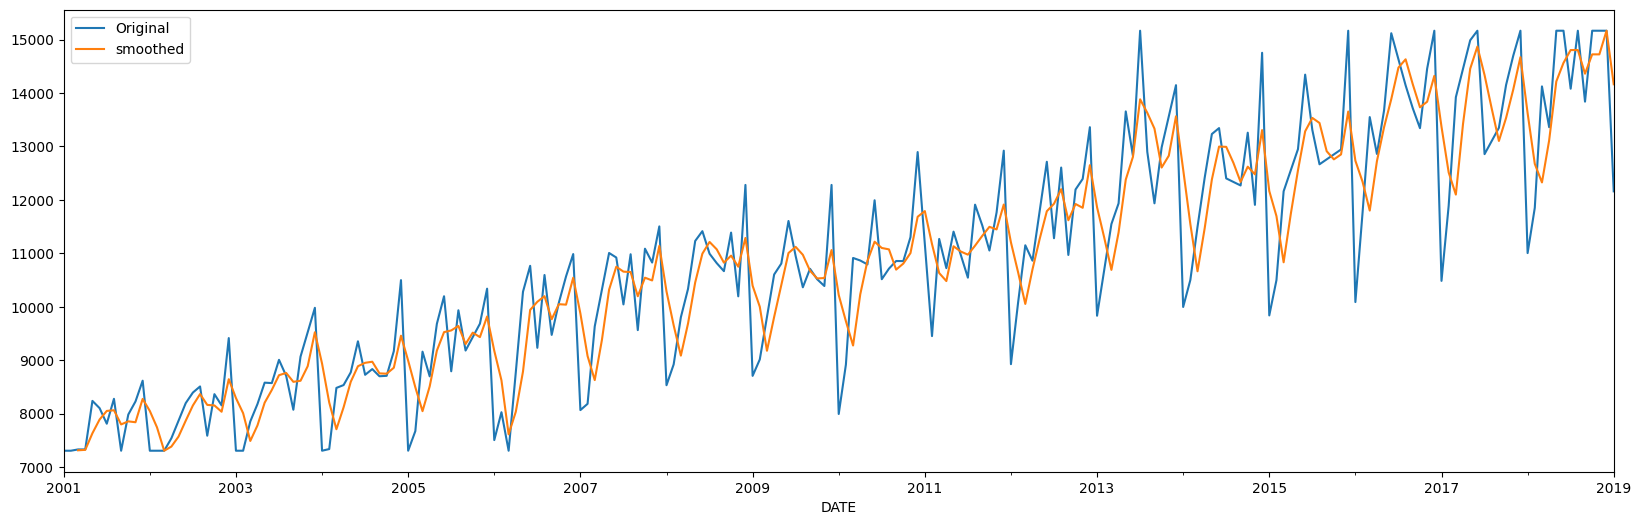

In [ ]:
df['Sales'].plot(label='Original')
df['Sales'].rolling(3,center=False).mean().plot(label='smoothed')
plt.legend()

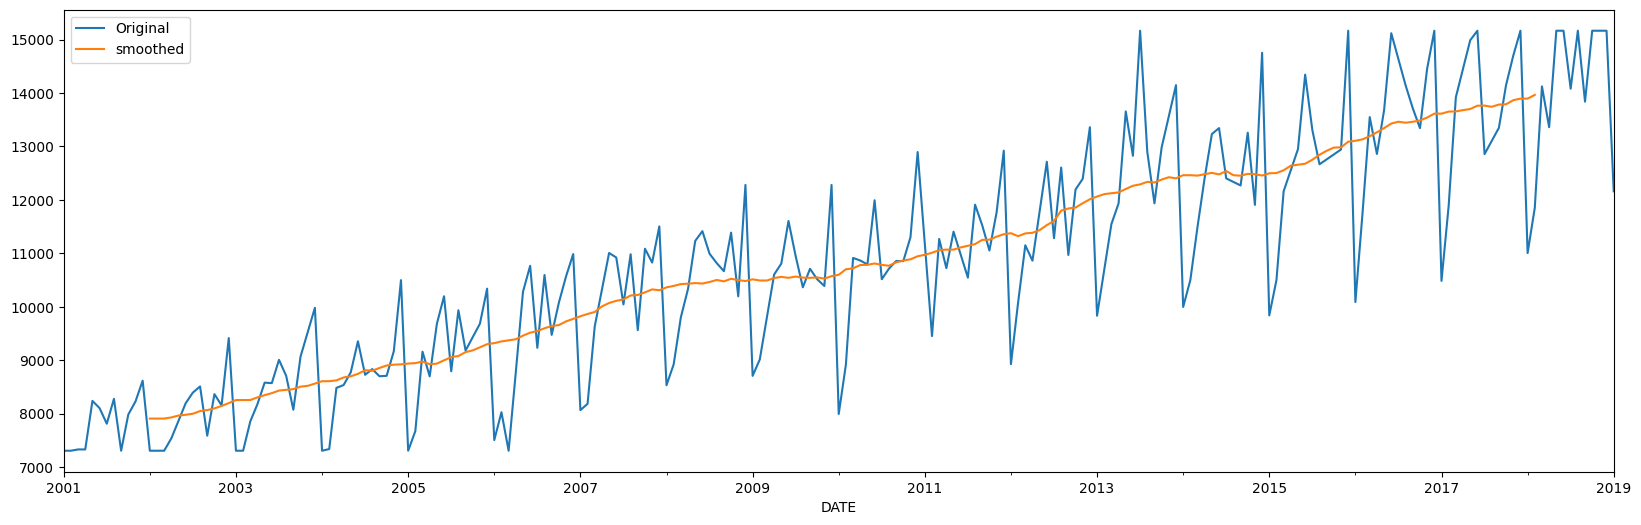

In [ ]:
df['Sales'].plot(label='Original')
df['Sales'].rolling(24,center=True).mean().plot(label='smoothed')
plt.legend()

# Time Series Decomposition

In [ ]:
import statsmodels.api as sm
model=sm.tsa.seasonal_decompose(df['Sales'],model='additive')


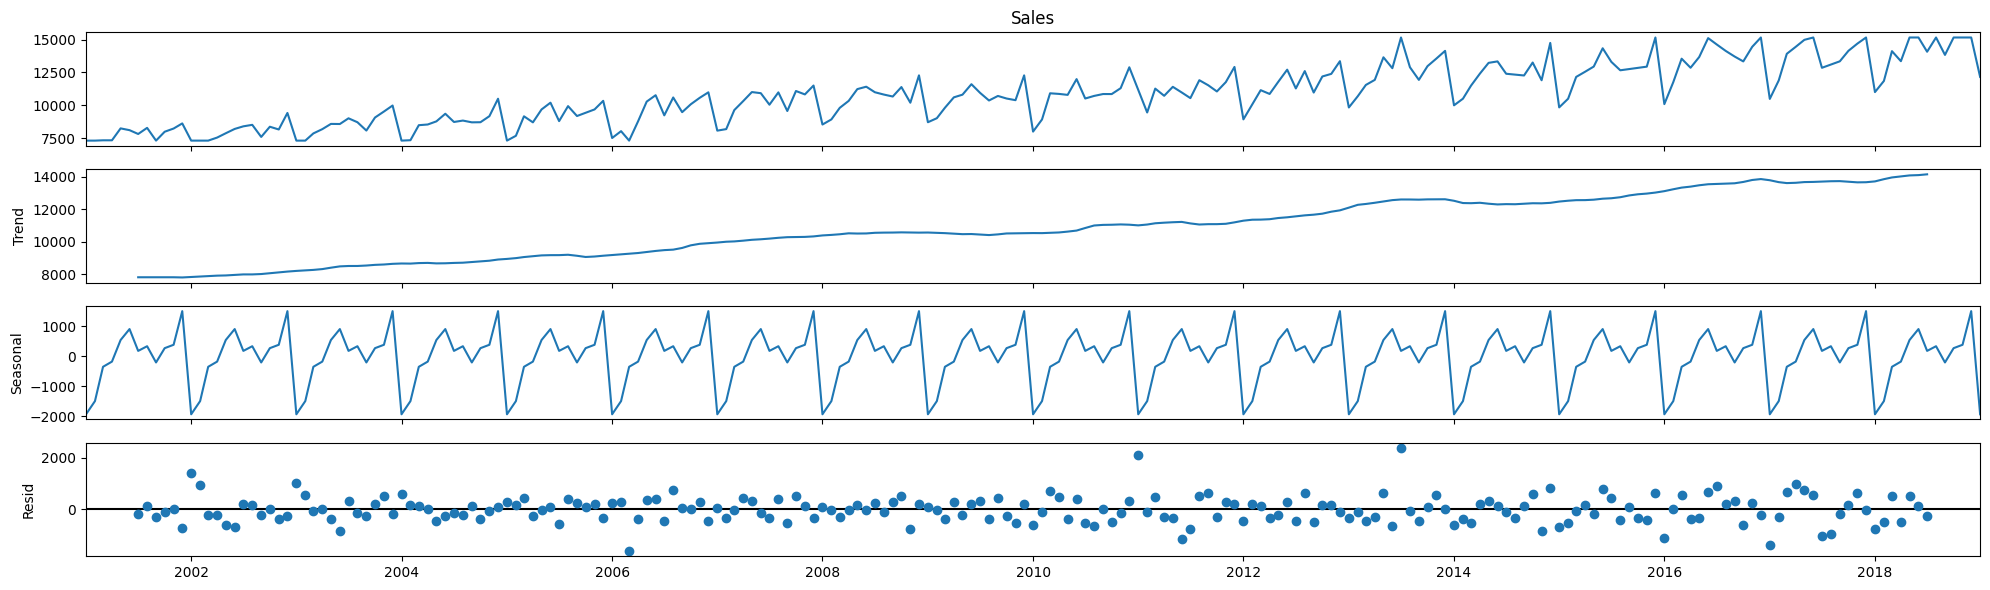

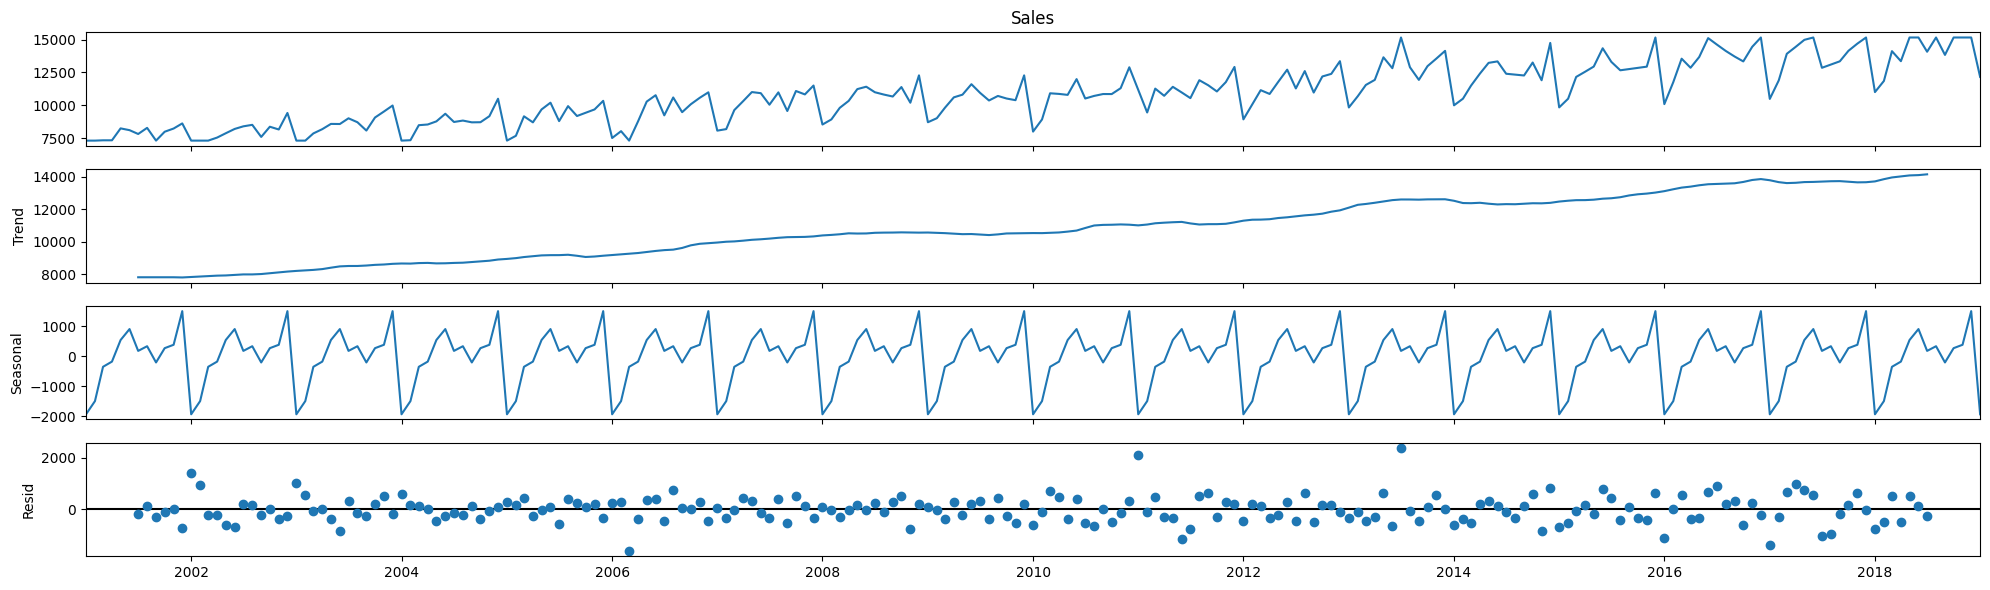

In [ ]:
model.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2001-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   217 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


<Axes: xlabel='DATE'>

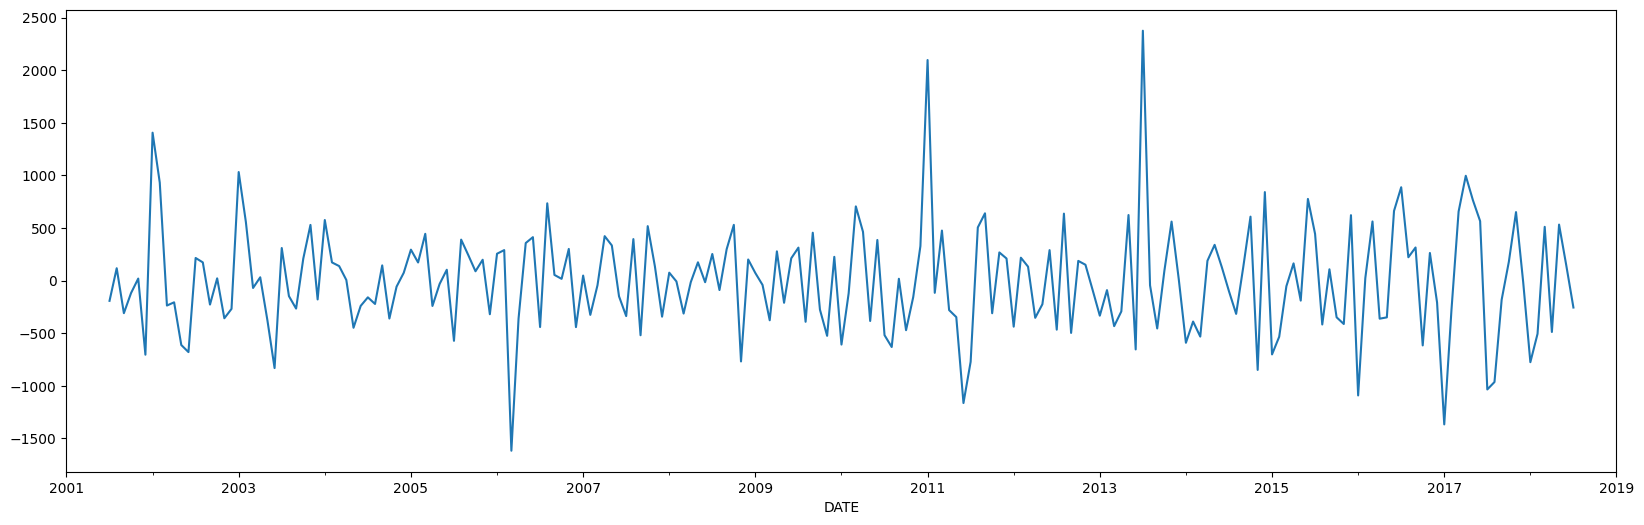

In [ ]:
model.resid.plot()

<Axes: >

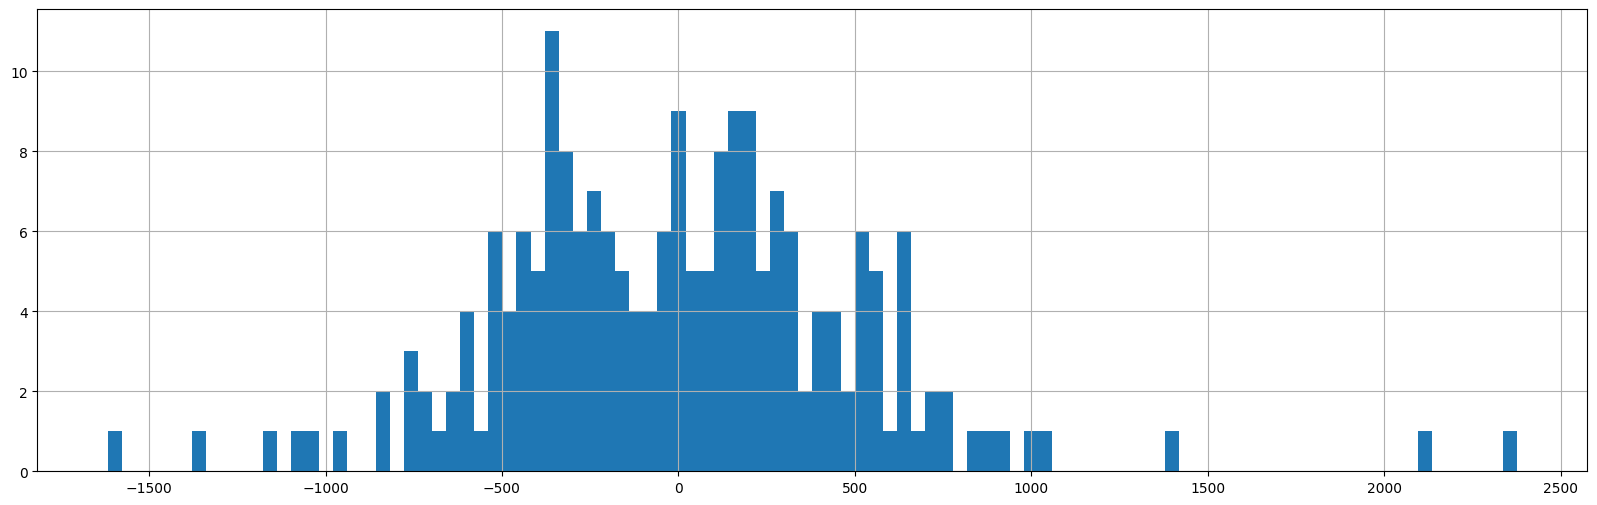

In [ ]:
model.resid.hist(bins=100)

In [ ]:
model.resid.mean()

-2.5477736928100967

# Train Test Split

In [ ]:
df.index[-12]

Timestamp('2018-02-01 00:00:00')

In [ ]:
train_x=df.loc[df.index < df.index[-12]].copy()
test_x=df.loc[df.index >= df.index[-12]].copy()
train_x


Sales
DATE               
2001-01-01   7307.8
2001-02-01   7307.8
2001-03-01   7332.0
2001-04-01   7332.0
2001-05-01   8240.0
...             ...
2017-09-01  13349.0
2017-10-01  14150.0
2017-11-01  14698.0
2017-12-01  15164.6
2018-01-01  11005.0

[205 rows x 1 columns]

In [ ]:
test_x

Sales
DATE               
2018-02-01  11852.0
2018-03-01  14123.0
2018-04-01  13360.0
2018-05-01  15164.6
2018-06-01  15164.6
2018-07-01  14080.0
2018-08-01  15164.6
2018-09-01  13838.0
2018-10-01  15164.6
2018-11-01  15164.6
2018-12-01  15164.6
2019-01-01  12160.0

# Different forecast methods

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
    )

def performance(actual,predicted):
  print('MSE :', np.round(mse(actual,predicted)**0.5,3))
  print('MAE :', np.round(mae(actual,predicted),3))
  print('MAPE :',np.round(mape(actual,predicted),3))


## Simplest forecast methods

### Mean Forecast

Average of all past k datapoints

MSE : 3725.69
MAE : 3540.89
MAPE : 0.244


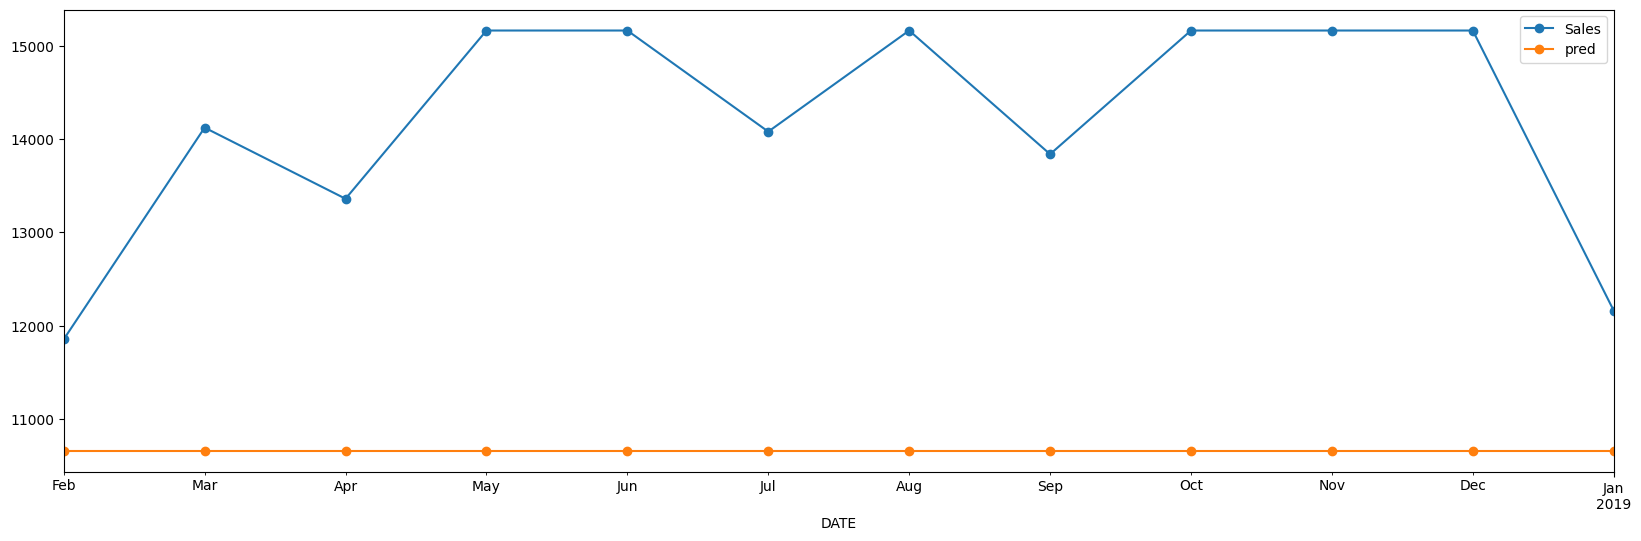

In [ ]:
test_x['pred']=train_x['Sales'].mean()
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### Naive Approach

<ipython-input-31-e0d468582818>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


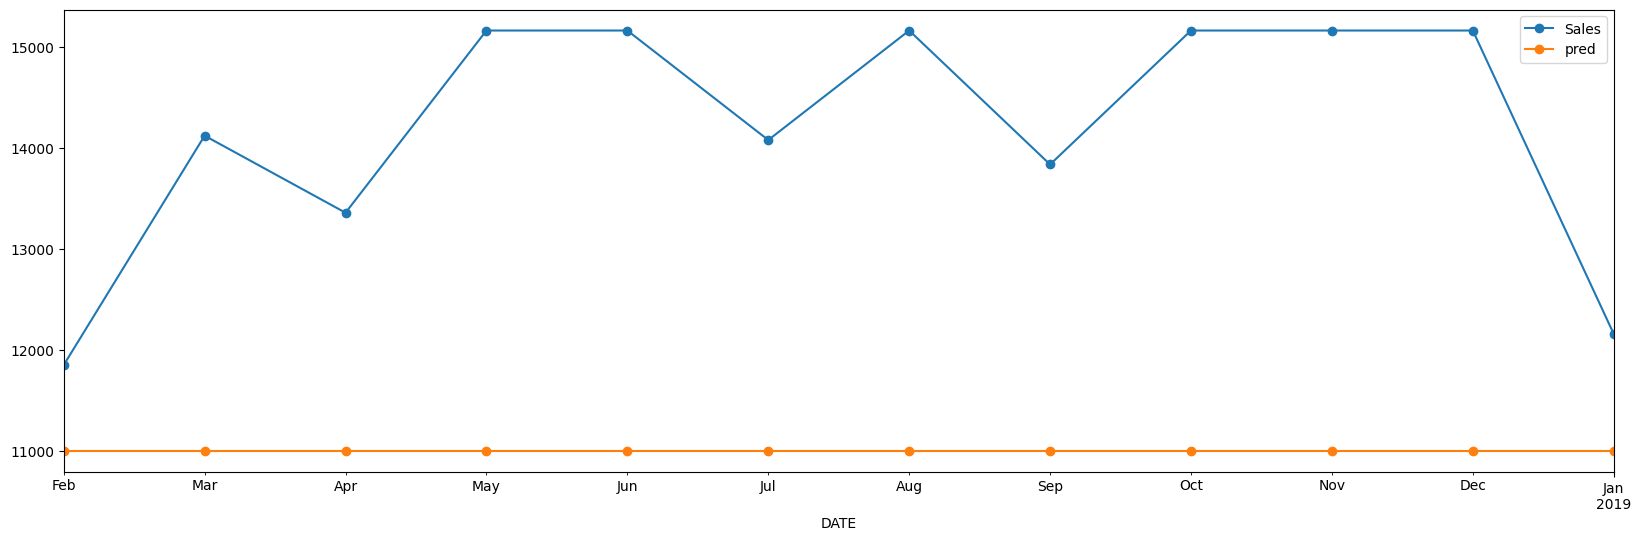

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

In [ ]:
train_x.iloc[-1]['Sales']

11005.0

MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


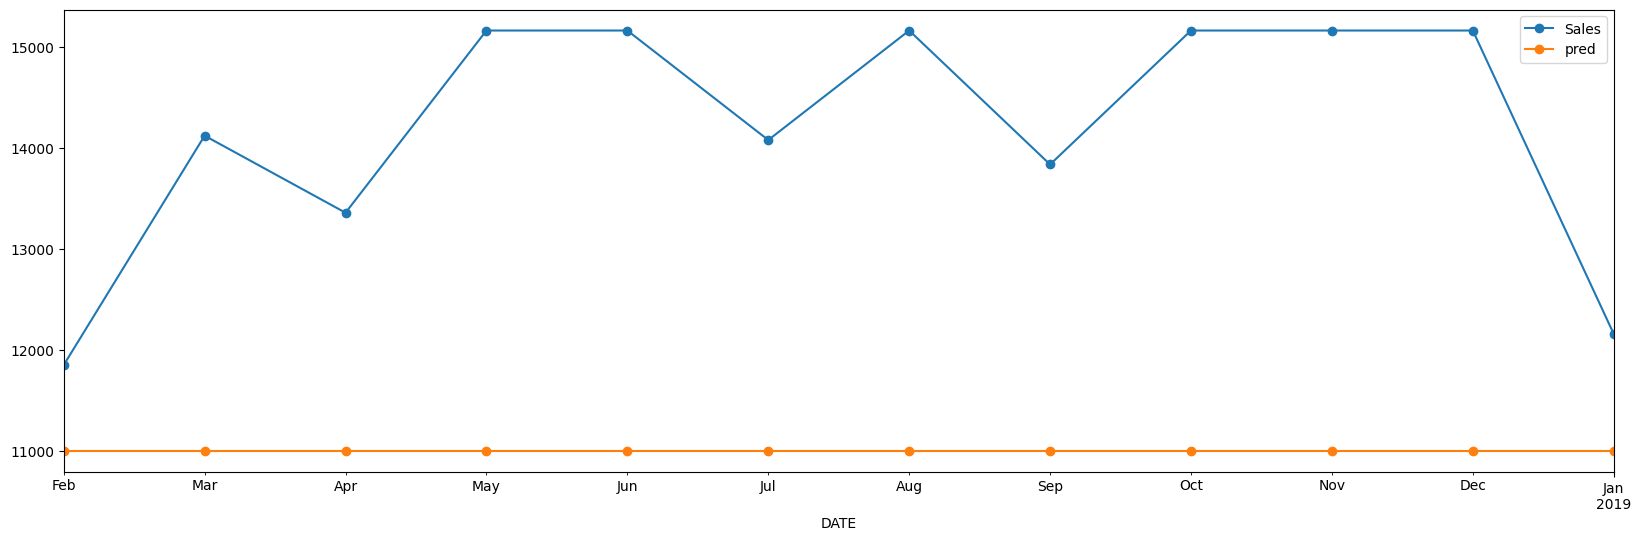

In [ ]:
test_x['pred']=train_x.iloc[-1]['Sales']
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

### Seasonal Naive Approach

<ipython-input-34-54f2e2048692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']


MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


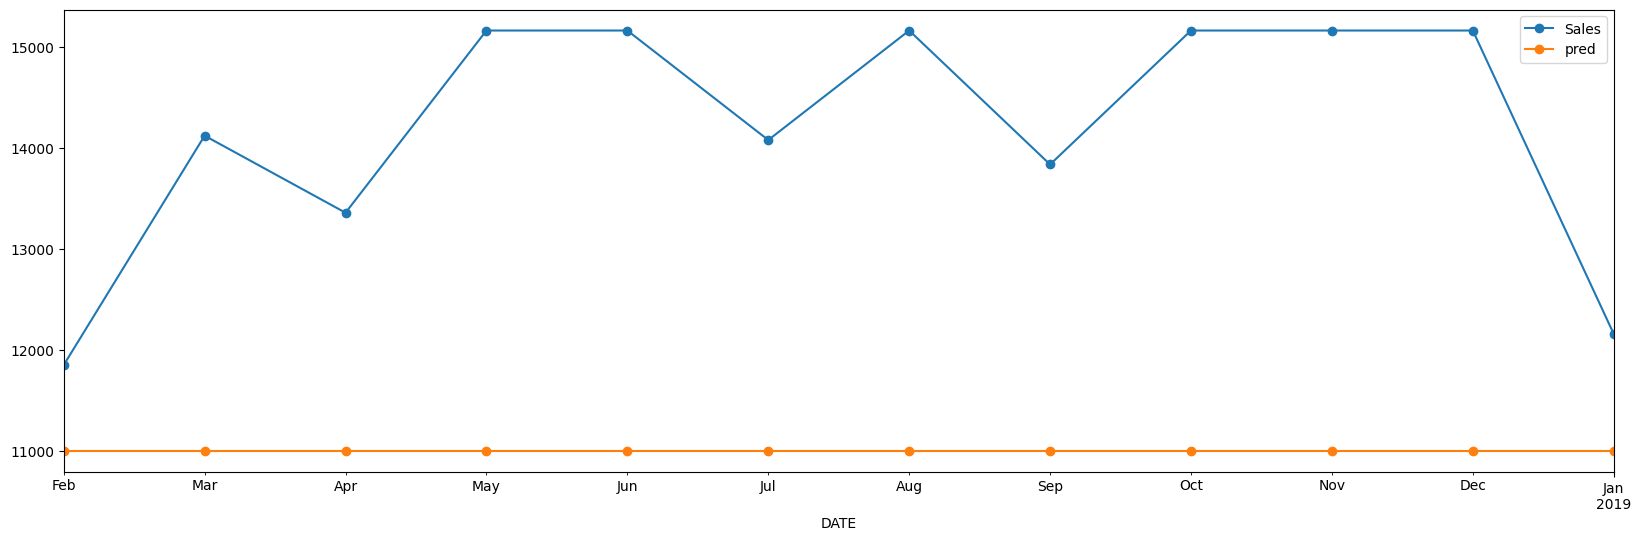

In [ ]:
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<ipython-input-35-5e514a1edd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.loc[i]['pred']= train_x.loc[i-pd.DateOffset(years=1)]['Sales']


MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


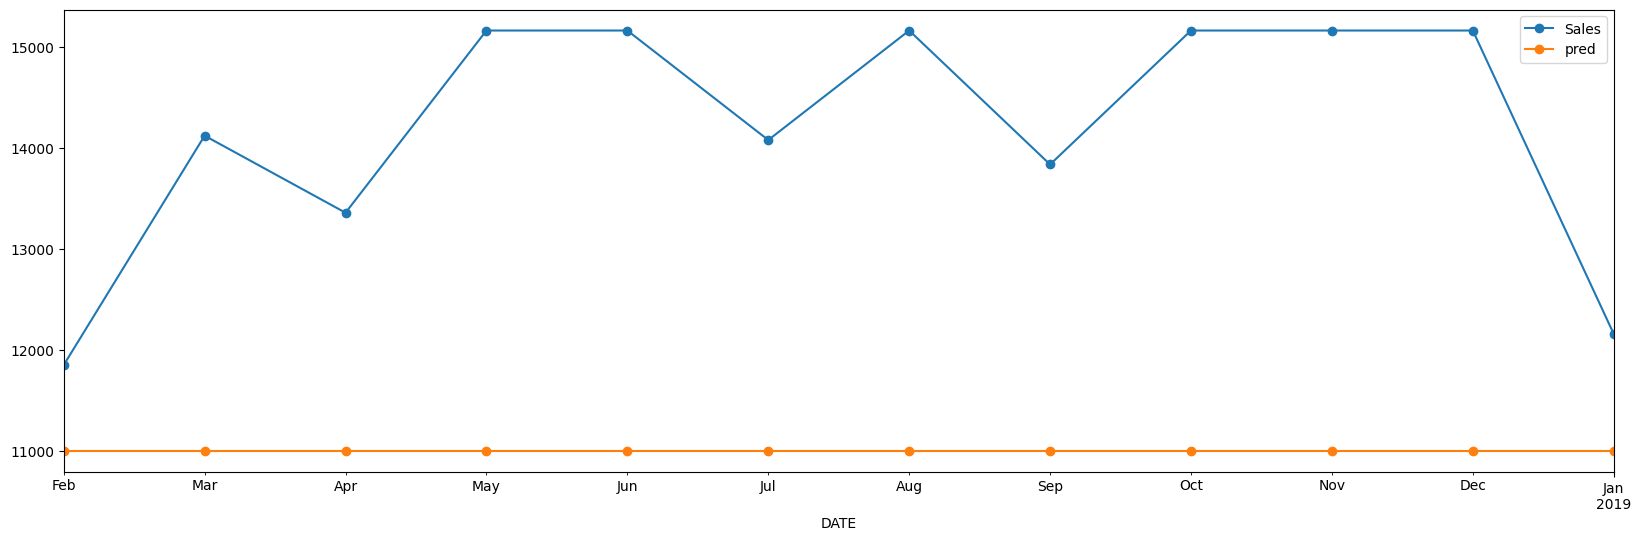

In [ ]:
for i in test_x.index:
  test_x.loc[i]['pred']= train_x.loc[i-pd.DateOffset(years=1)]['Sales']
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

In [ ]:
test_x['pred']

DATE
2018-02-01    11005.0
2018-03-01    11005.0
2018-04-01    11005.0
2018-05-01    11005.0
2018-06-01    11005.0
2018-07-01    11005.0
2018-08-01    11005.0
2018-09-01    11005.0
2018-10-01    11005.0
2018-11-01    11005.0
2018-12-01    11005.0
2019-01-01    11005.0
Name: pred, dtype: float64

### Drift Method

<ipython-input-37-5eb63491f798>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t=train_x['Sales'][-1]
<ipython-input-37-5eb63491f798>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=(y_t-train_x['Sales'][0])/len(train_x)


MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


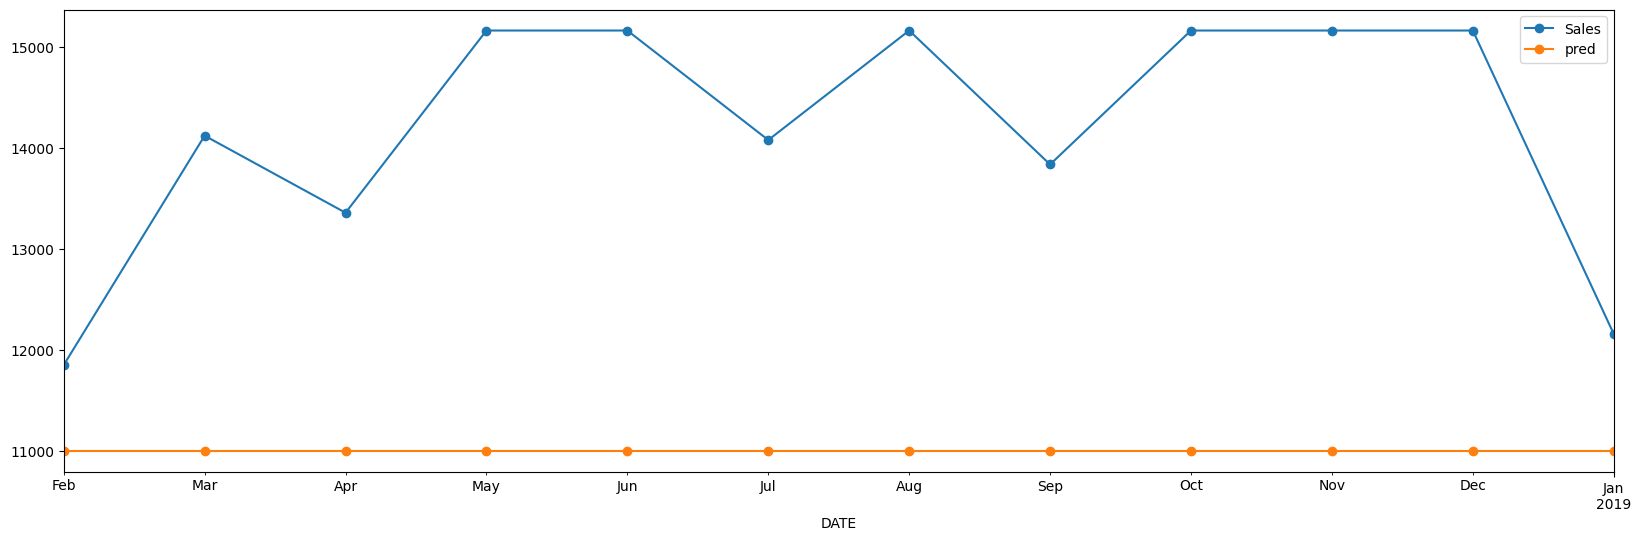

In [ ]:
y_t=train_x['Sales'][-1]
m=(y_t-train_x['Sales'][0])/len(train_x)
h=np.linspace(0,len(test_x)-1,len(test_x))
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])


<ipython-input-38-b11247004181>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t=train_x['Sales'][-2]
<ipython-input-38-b11247004181>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=(y_t-train_x['Sales'][0])/len(train_x)


MSE : 3398.707
MAE : 3195.05
MAPE : 0.219


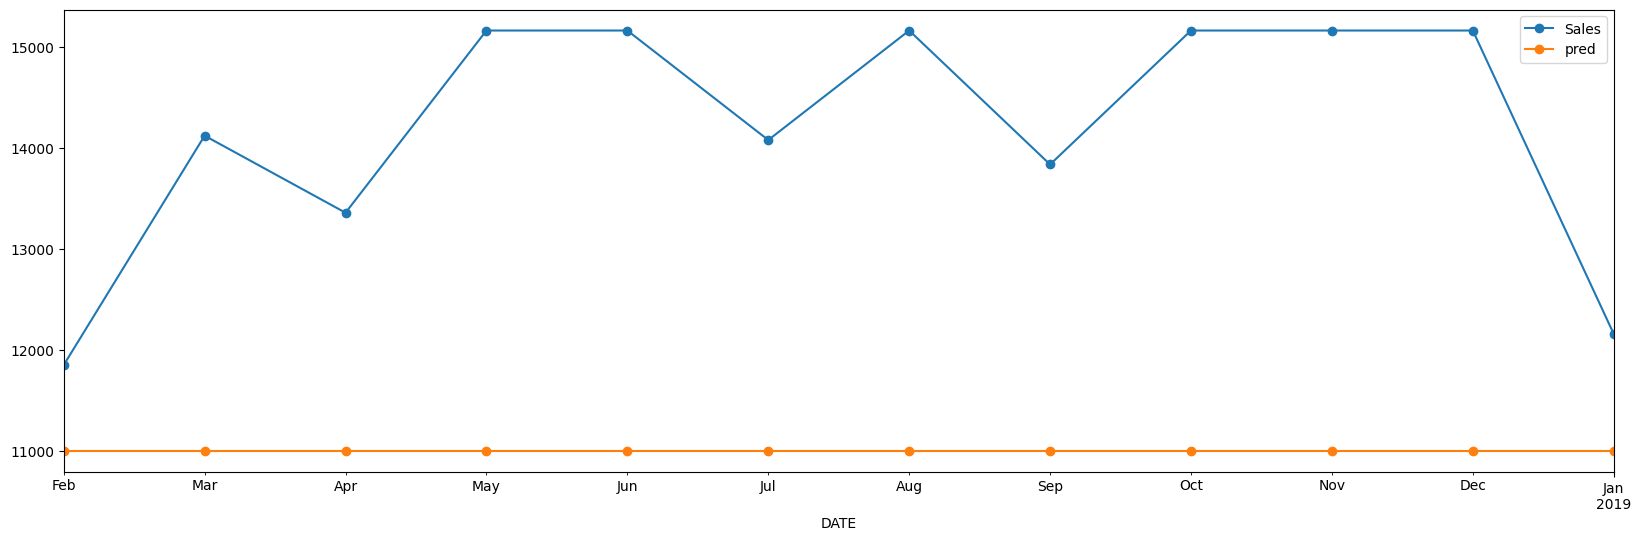

In [ ]:
y_t=train_x['Sales'][-2]
m=(y_t-train_x['Sales'][0])/len(train_x)
h=np.linspace(0,len(test_x)-1,len(test_x))
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

## Smoothning Based Approach

### Moving Average based Approach

## Simple exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


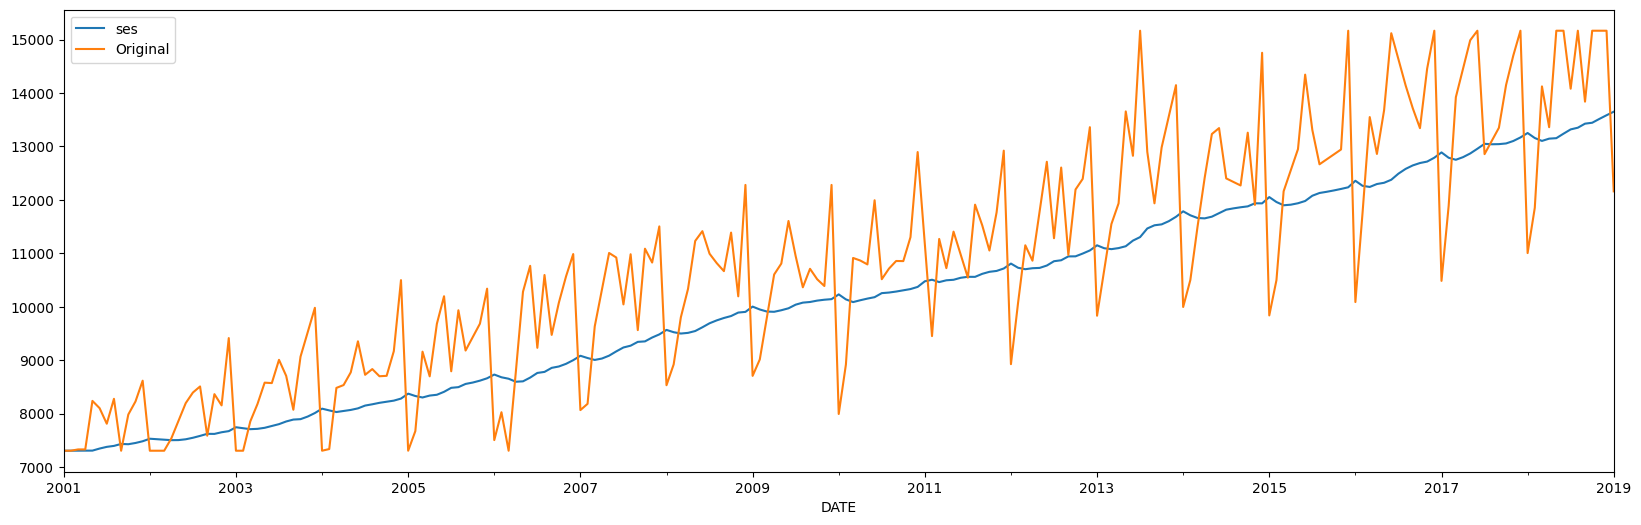

In [ ]:
import statsmodels.api as sm
model=pd.Series(sm.tsa.SimpleExpSmoothing(df.Sales).fit(smoothing_level=1/(2*12)).fittedvalues)
model.plot(label='ses')
df['Sales'].plot(label='Original')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


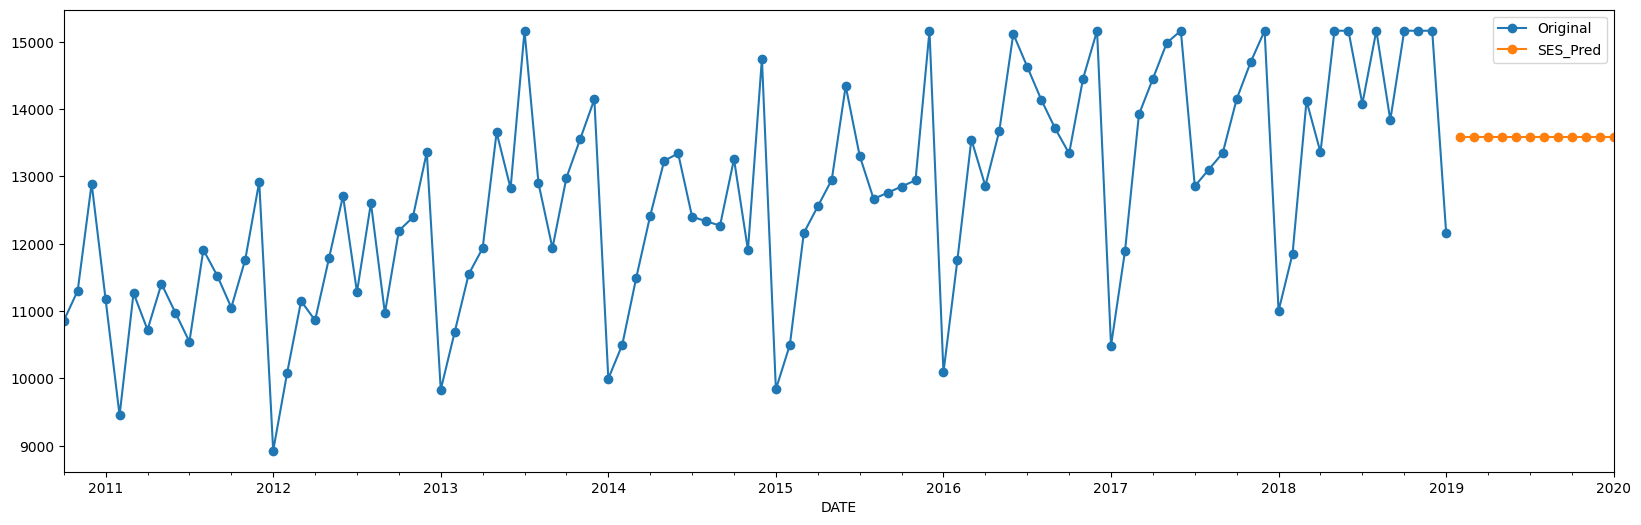

In [ ]:
model=sm.tsa.SimpleExpSmoothing(df.Sales).fit(smoothing_level=1/(2*12))
pred=model.forecast(steps=12)
df.Sales.tail(100).plot(label='Original',style='-o')
pred.plot(label='SES_Pred',style='-o')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MSE : 1558.716
MAE : 1426.325
MAPE : 0.099


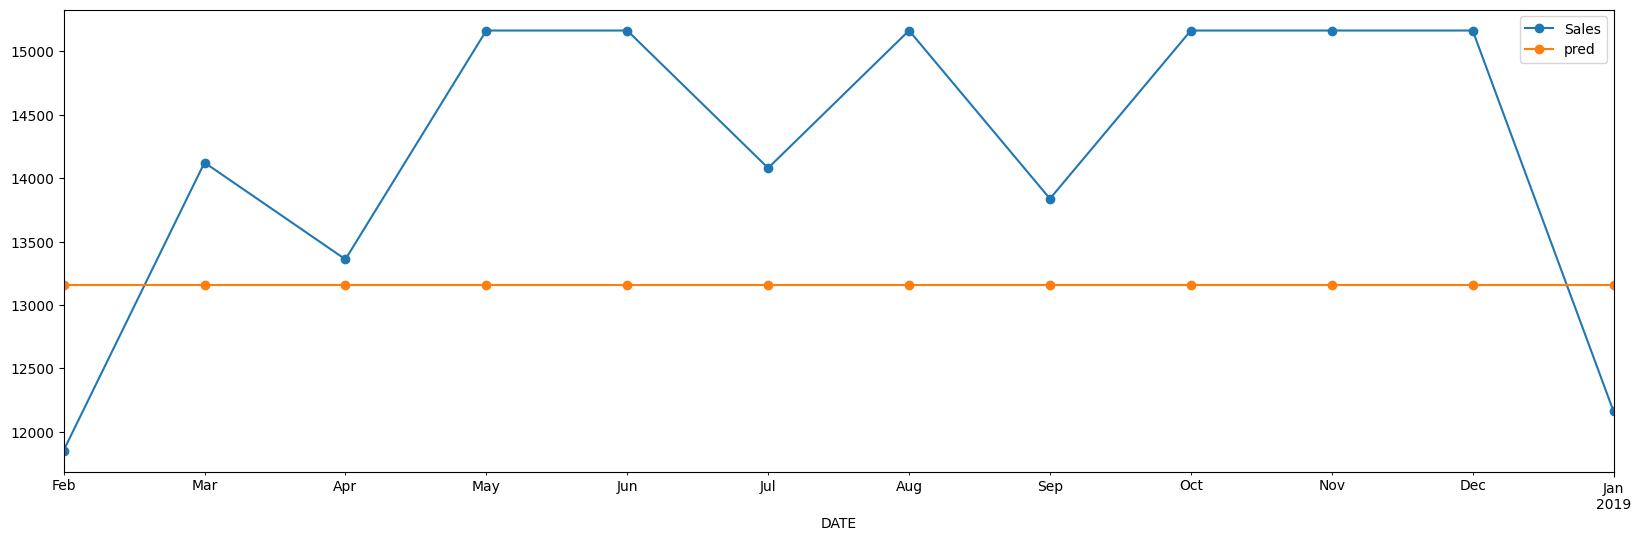

In [ ]:
model=sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))
test_x['pred']= model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])


In [ ]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  13157.587565
2018-03-01  14123.0  13157.587565
2018-04-01  13360.0  13157.587565
2018-05-01  15164.6  13157.587565
2018-06-01  15164.6  13157.587565
2018-07-01  14080.0  13157.587565
2018-08-01  15164.6  13157.587565
2018-09-01  13838.0  13157.587565
2018-10-01  15164.6  13157.587565
2018-11-01  15164.6  13157.587565
2018-12-01  15164.6  13157.587565
2019-01-01  12160.0  13157.587565

## Double Exponential Smoothing - DES

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


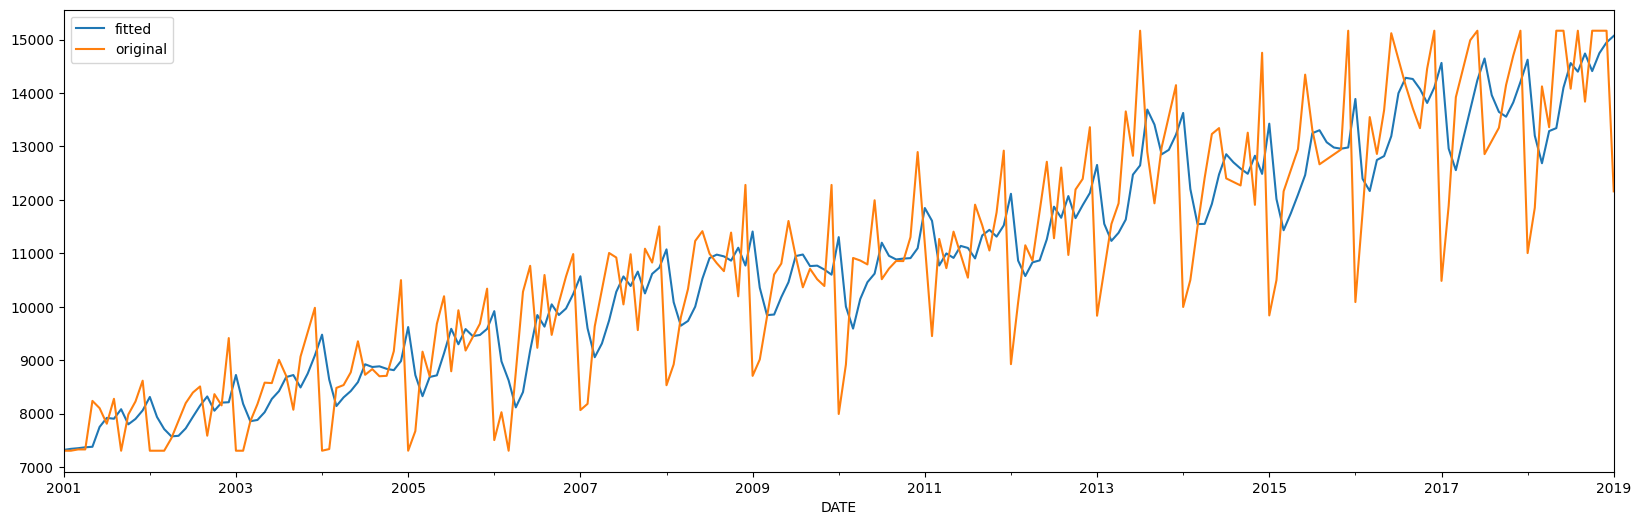

In [ ]:
model=sm.tsa.ExponentialSmoothing(df.Sales, trend='add').fit(smoothing_level=0.4).fittedvalues
model.plot(label='fitted')
df.Sales.plot(label='original')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


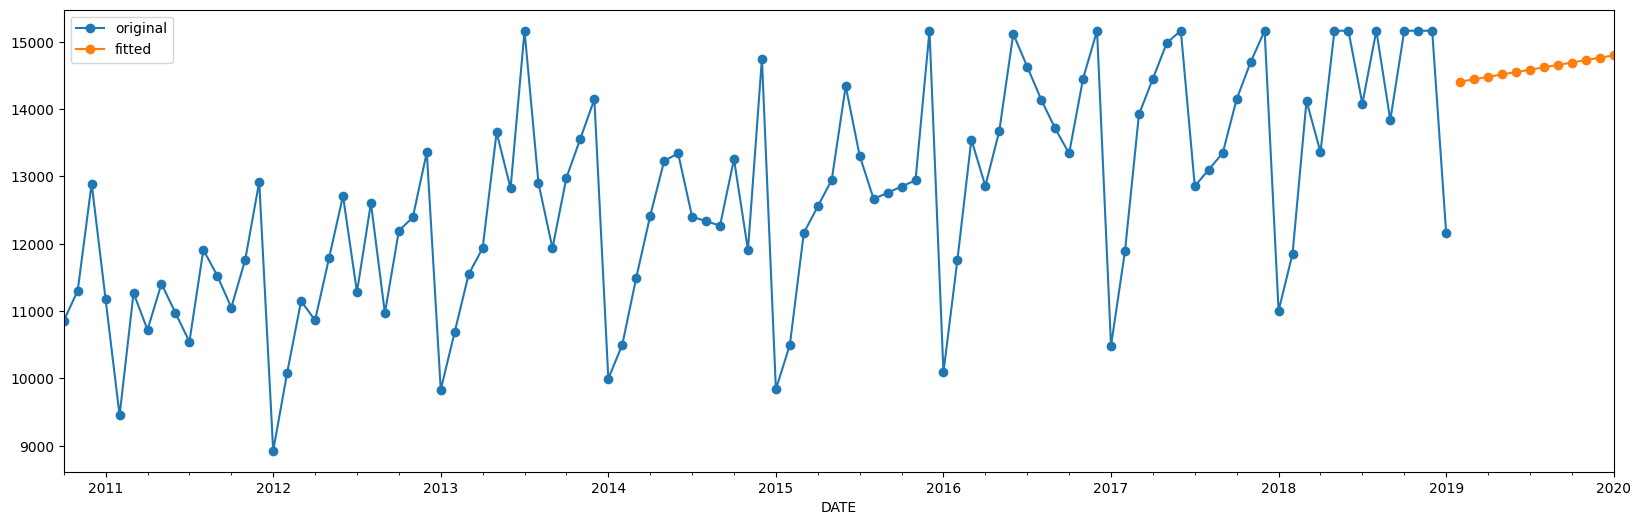

In [ ]:
model=sm.tsa.ExponentialSmoothing(df.Sales,trend='add').fit(smoothing_level=1/(2*12))
pred=model.forecast(steps=12)
df.Sales.tail(100).plot(label='original',style='-o')
pred.plot(label='fitted',style='-o')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE : 1137.6
MAE : 944.412
MAPE : 0.069


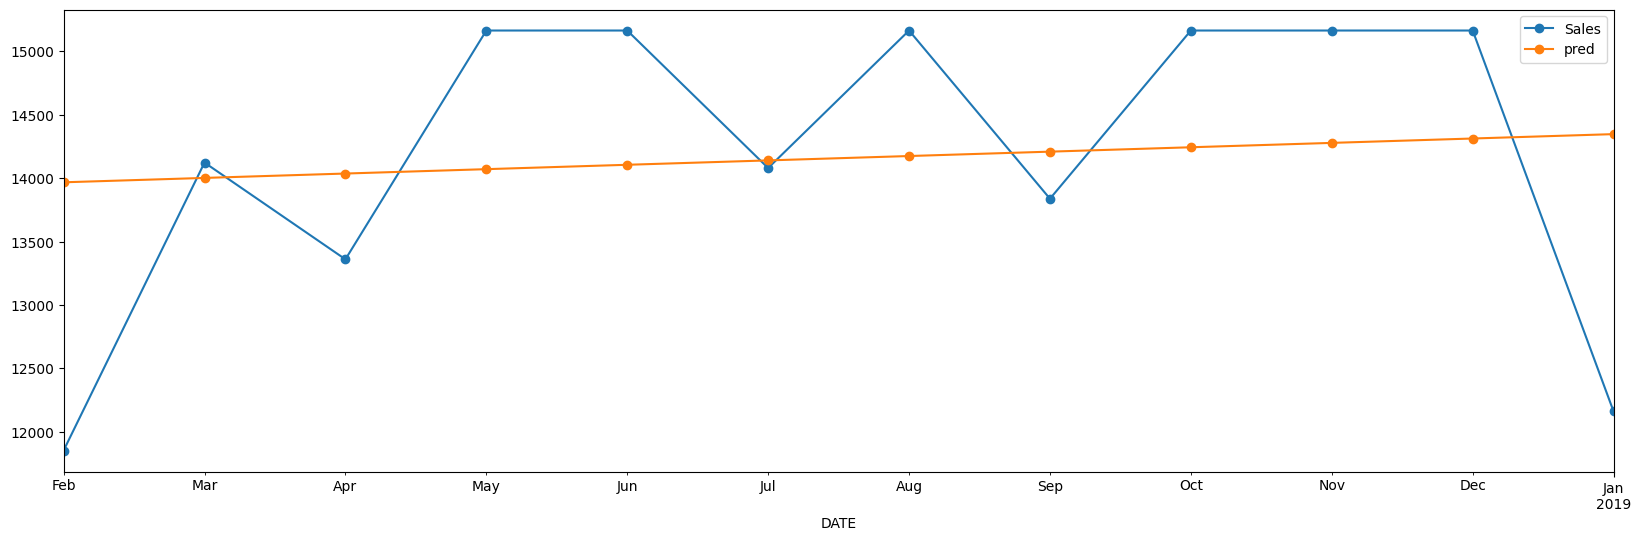

In [ ]:
model=sm.tsa.ExponentialSmoothing(train_x.Sales,trend='add').fit(smoothing_level=1/(2*12))
test_x['pred']=model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

## Triple Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


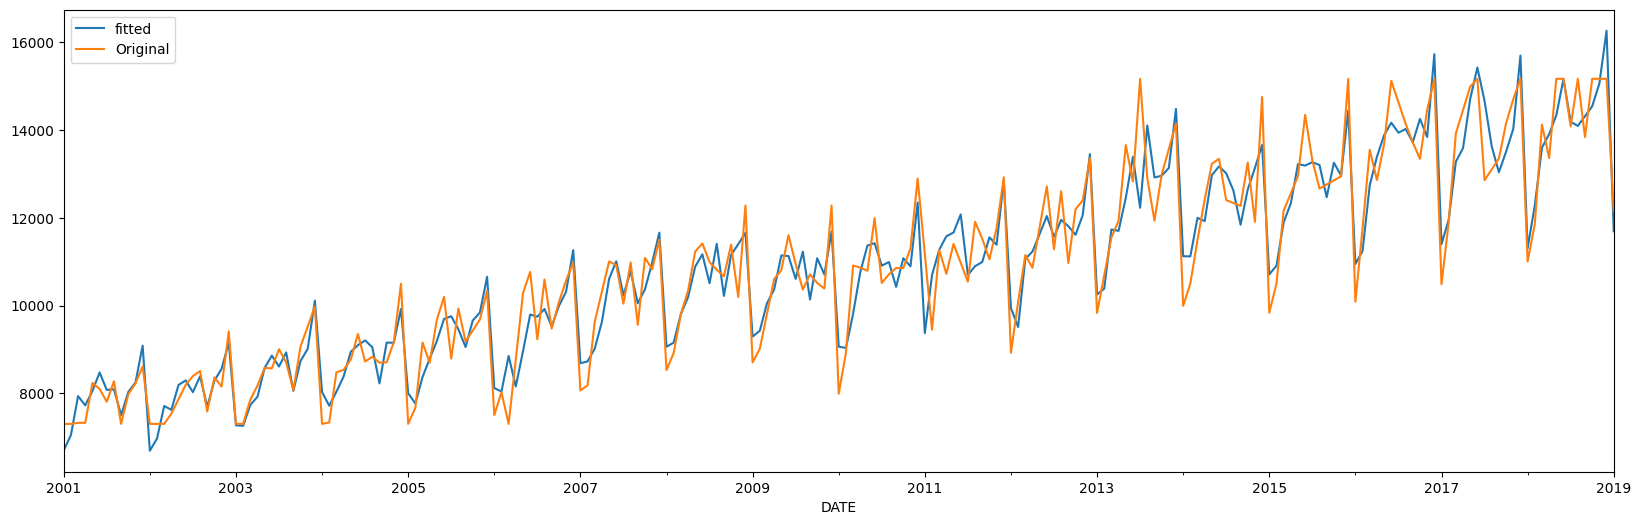

In [ ]:
model=sm.tsa.ExponentialSmoothing(df.Sales,trend='add',seasonal='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted')
df.Sales.plot(label='Original')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


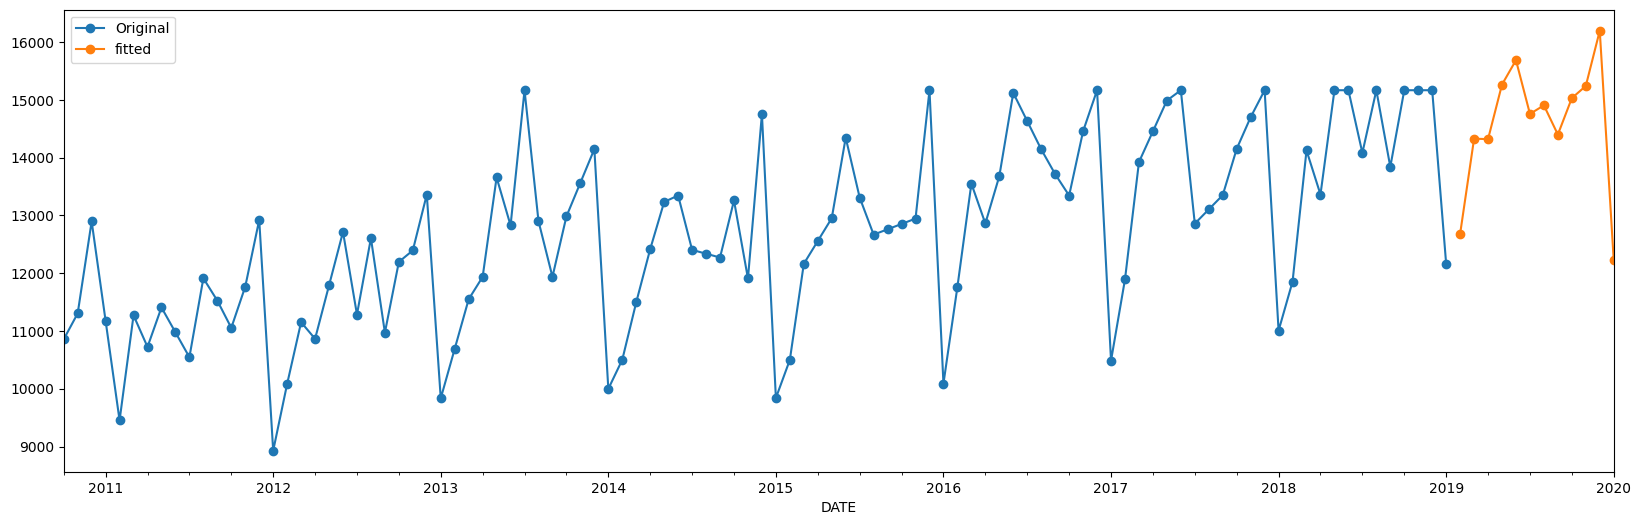

In [ ]:
model=sm.tsa.ExponentialSmoothing(df.Sales,trend='add',seasonal='add').fit(smoothing_level=1/(2*12))
pred=model.forecast(steps=12)
df.Sales.tail(100).plot(label='Original',style='-o')
pred.plot(label='fitted',style='-o')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE : 527.638
MAE : 468.585
MAPE : 0.033


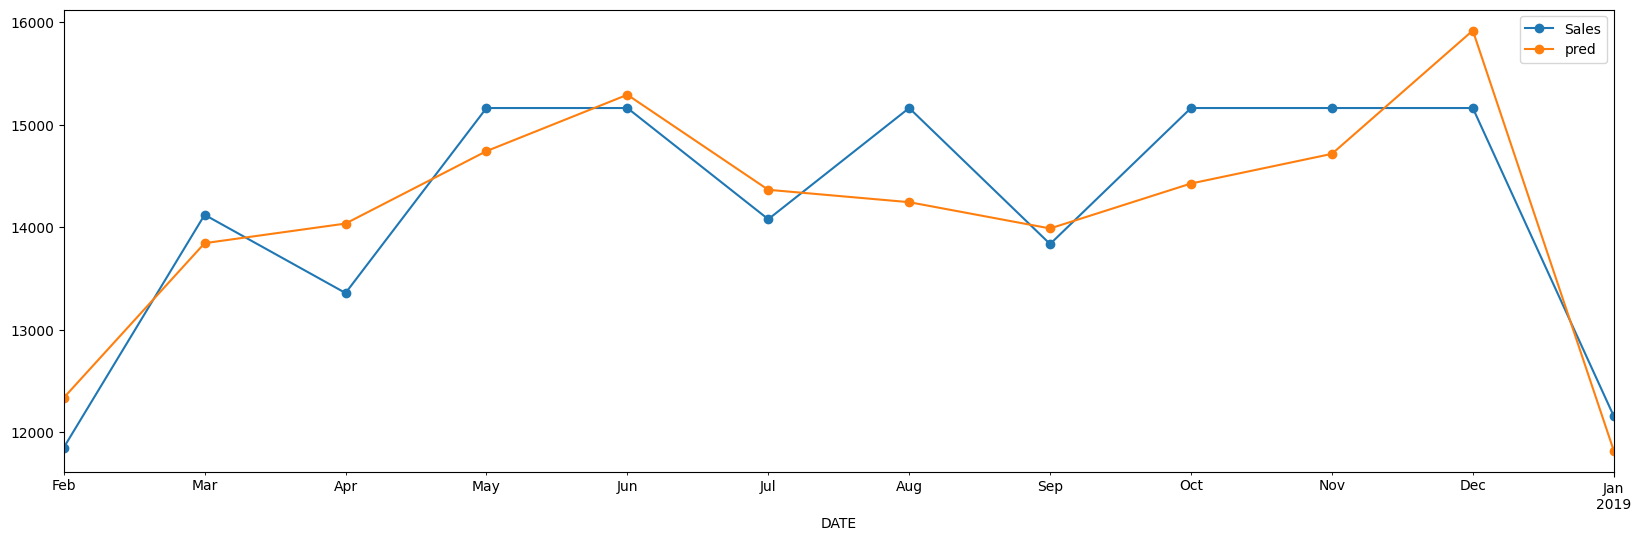

In [ ]:
model=sm.tsa.ExponentialSmoothing(train_x.Sales,trend='add',seasonal='add').fit(smoothing_level=1/(2*12))
test_x['pred']=model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

# Stationarity

## How we can check data is stationary

In [ ]:
def adf_test(df):
  p_value = sm.tsa.stattools.adfuller(df)[1]
  if p_value < 0.05:
    print("Reject H0: Data is Stationary")
  else :
    print("Failed Reject H0: Data is not Stationary")
adf_test(df.Sales)

Failed Reject H0: Data is not Stationary


## Detrend

<Axes: xlabel='DATE'>

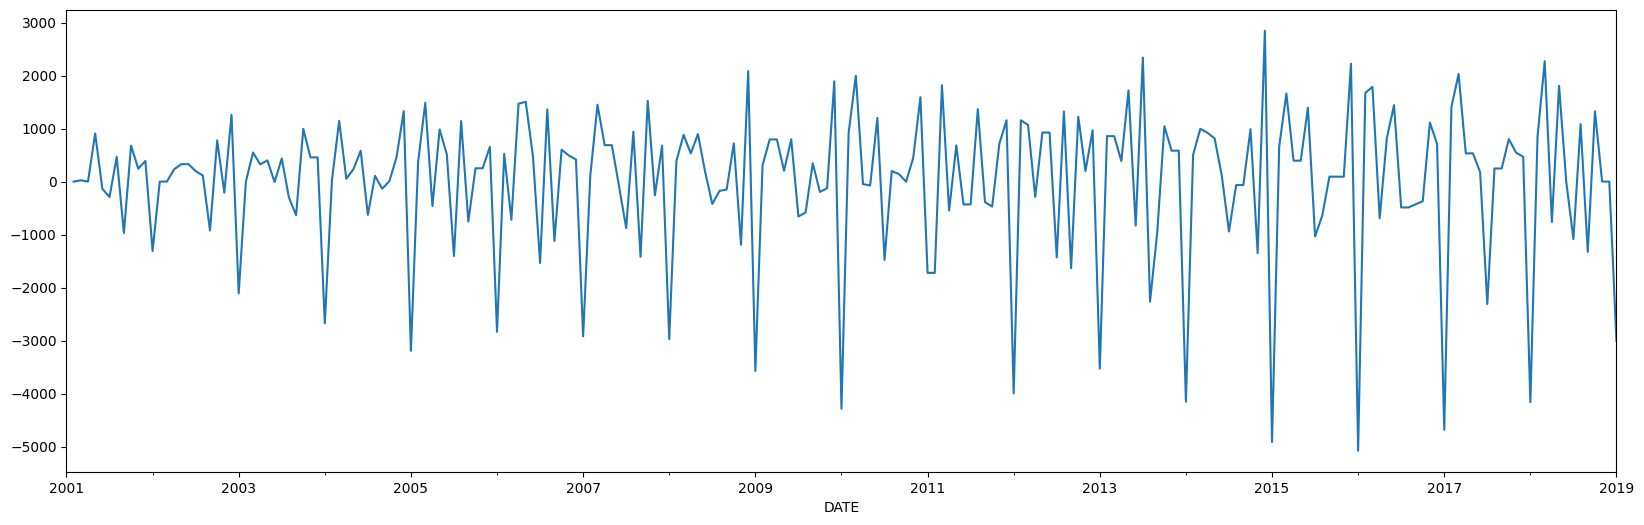

In [ ]:
detrend= df.Sales.diff(1)
detrend.plot()

In [ ]:
adf_test(detrend.dropna())

Reject H0: Data is Stationary


## De-Seasonal

<Axes: xlabel='DATE'>

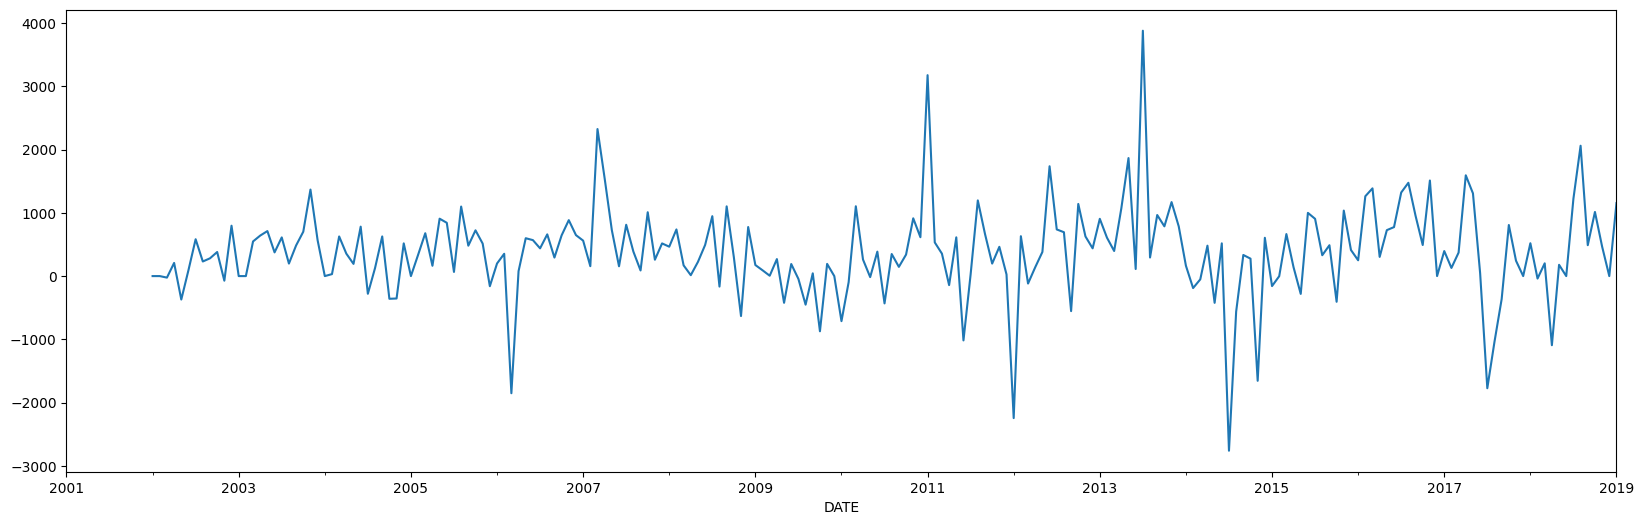

In [ ]:
deseasonal=df['Sales'].diff(12)
deseasonal.plot()

In [ ]:
adf_test(deseasonal.dropna())

Reject H0: Data is Stationary


## Detrend and Deseasonal

<Axes: xlabel='DATE'>

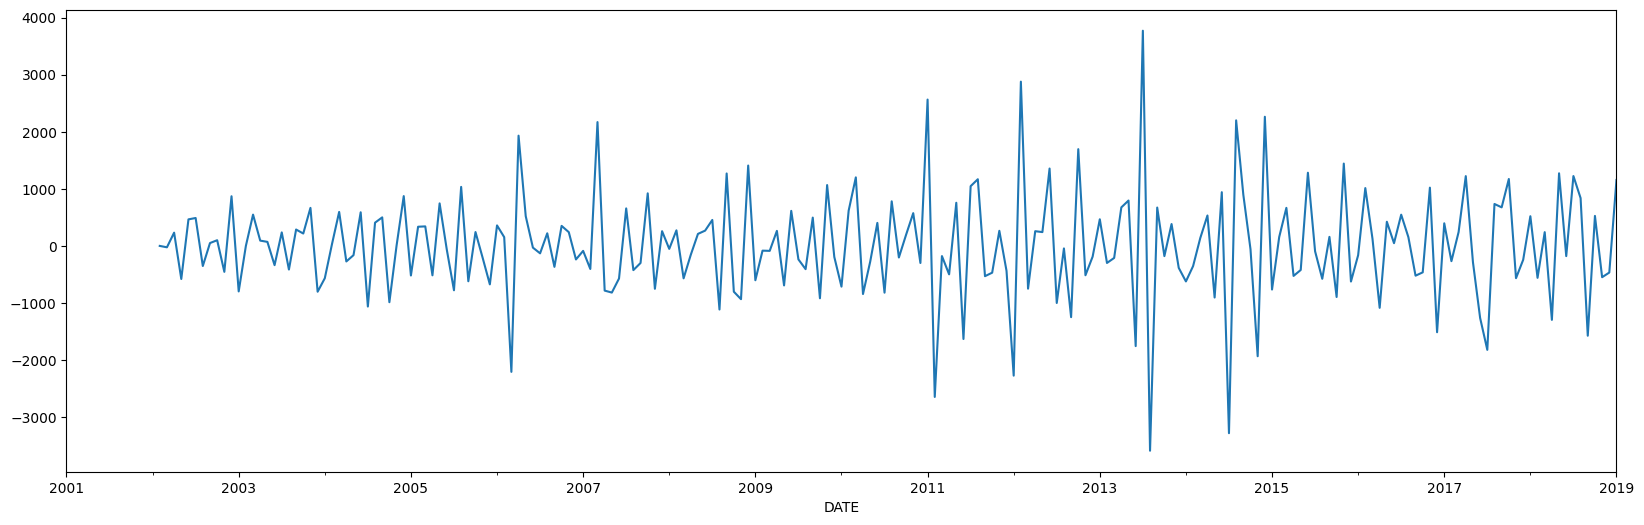

In [ ]:
stationary_data=df.Sales.diff(1).diff(12)
stationary_data.plot()

In [ ]:
adf_test(stationary_data.dropna())

Reject H0: Data is Stationary


## Autocorrelation

In [ ]:
df.Sales.shift(1).head()

DATE
2001-01-01       NaN
2001-02-01    7307.8
2001-03-01    7307.8
2001-04-01    7332.0
2001-05-01    7332.0
Name: Sales, dtype: float64

In [ ]:
df.Sales.reset_index()

DATE    Sales
0   2001-01-01   7307.8
1   2001-02-01   7307.8
2   2001-03-01   7332.0
3   2001-04-01   7332.0
4   2001-05-01   8240.0
..         ...      ...
212 2018-09-01  13838.0
213 2018-10-01  15164.6
214 2018-11-01  15164.6
215 2018-12-01  15164.6
216 2019-01-01  12160.0

[217 rows x 2 columns]

In [ ]:
lag=1
np.corrcoef(df.Sales[lag:],df.Sales.shift(lag)[lag:])[0][1]

0.8107166374274489

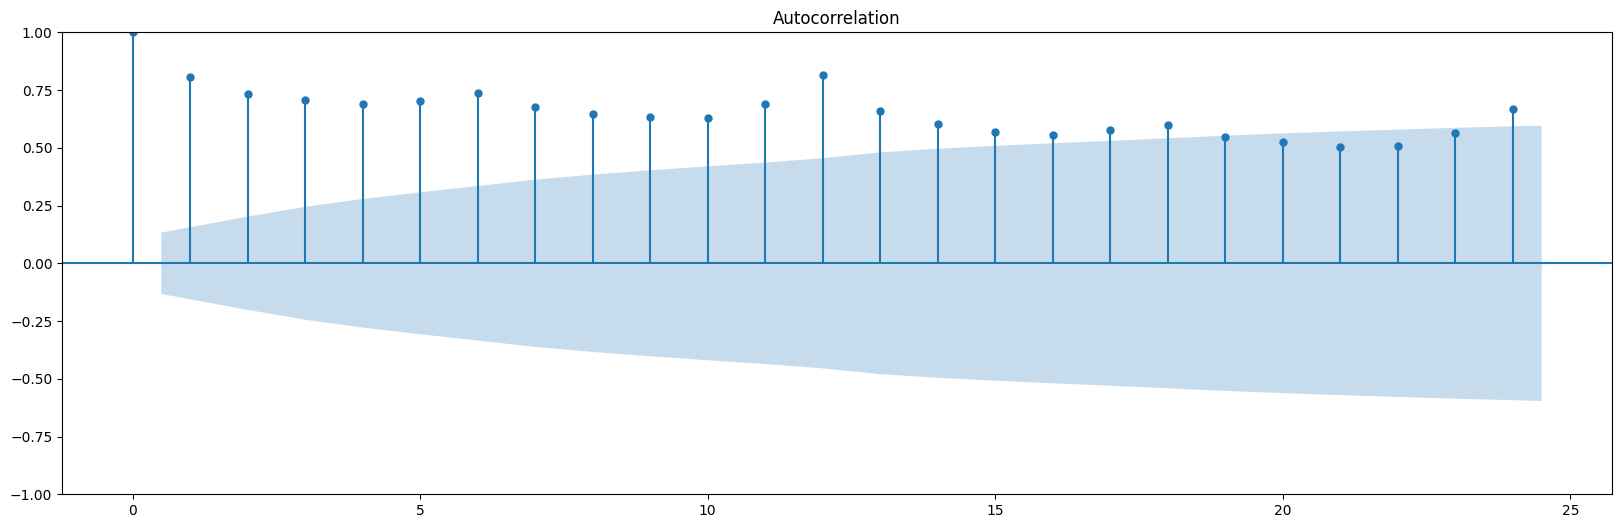

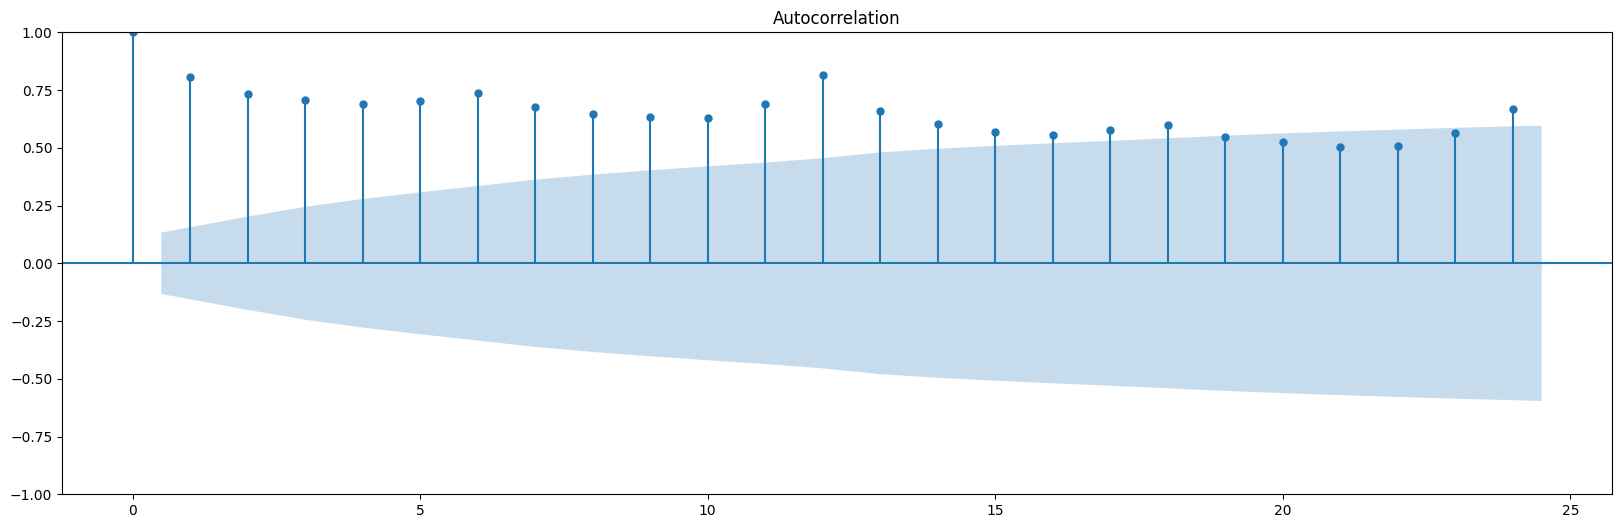

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.Sales)

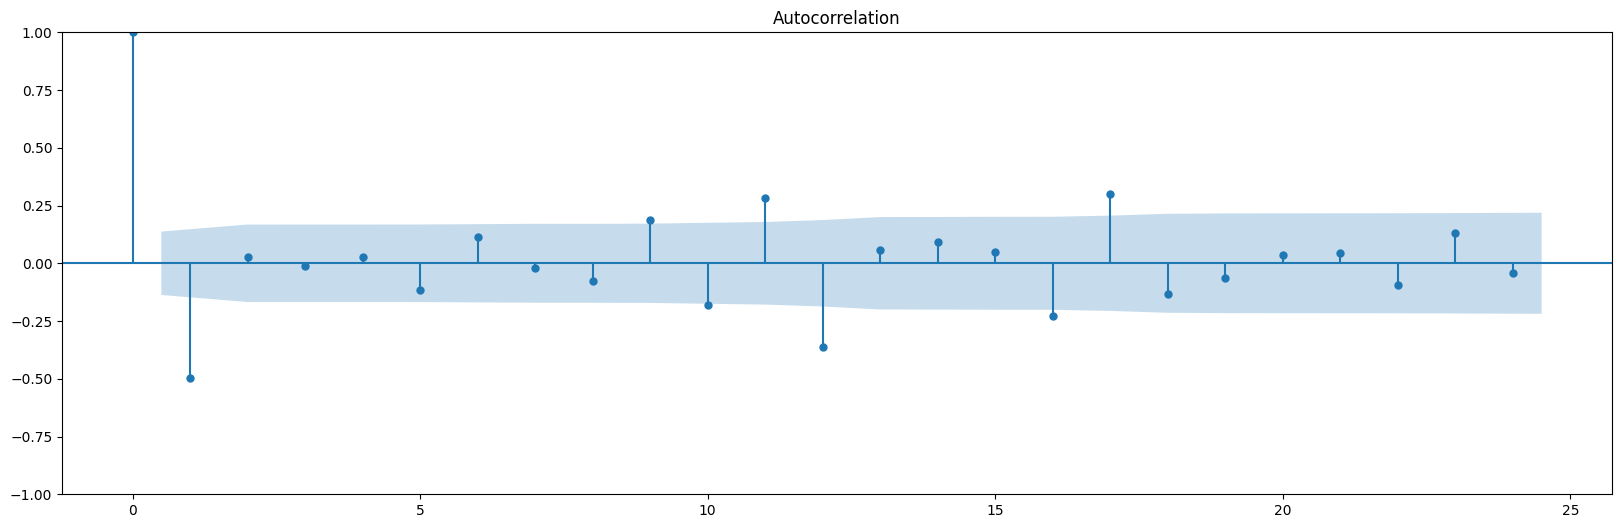

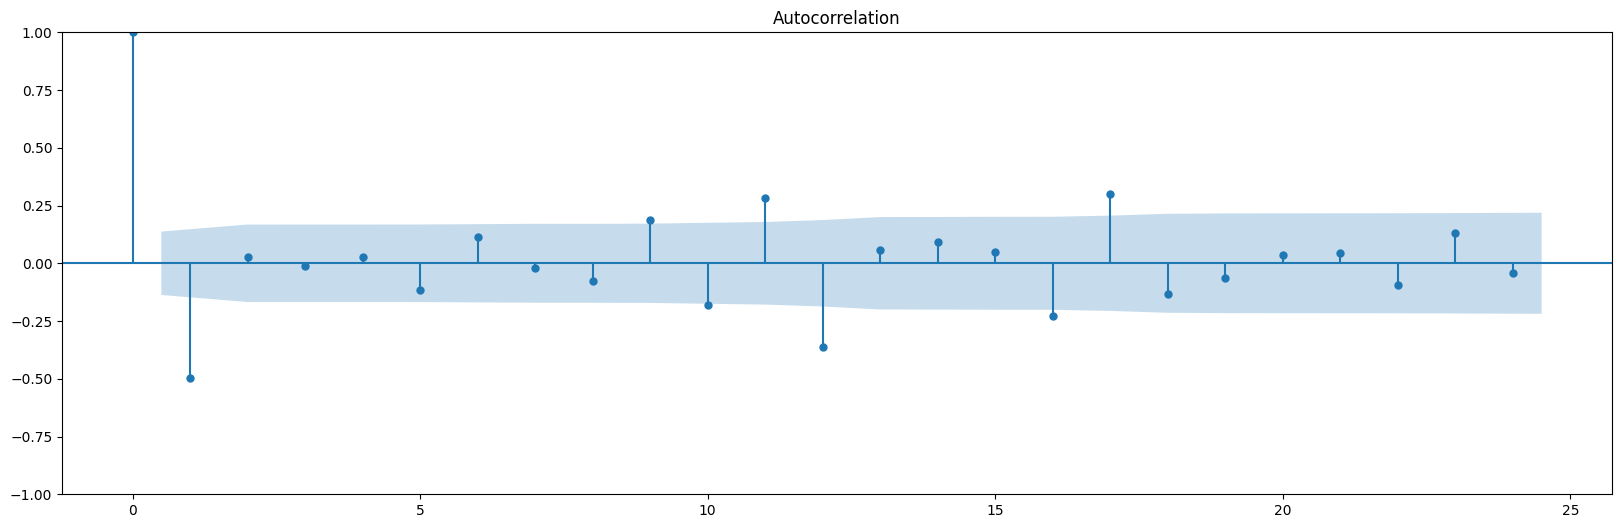

In [ ]:
plot_acf(df.Sales.diff().diff(12).dropna())

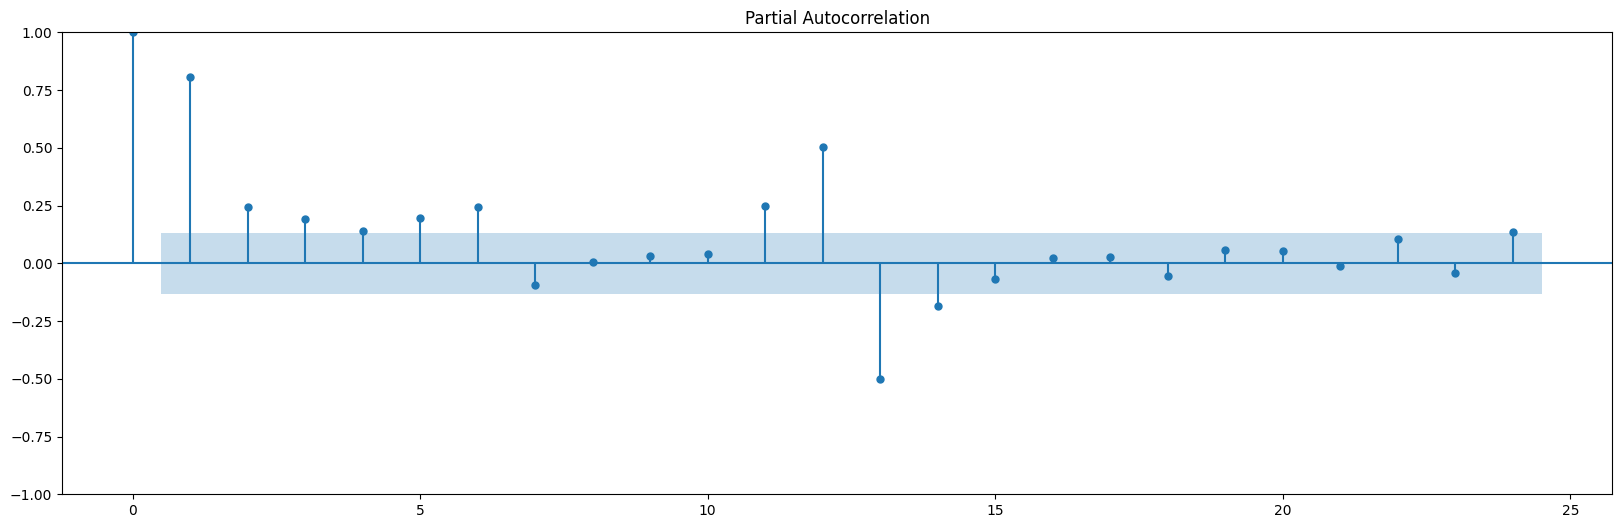

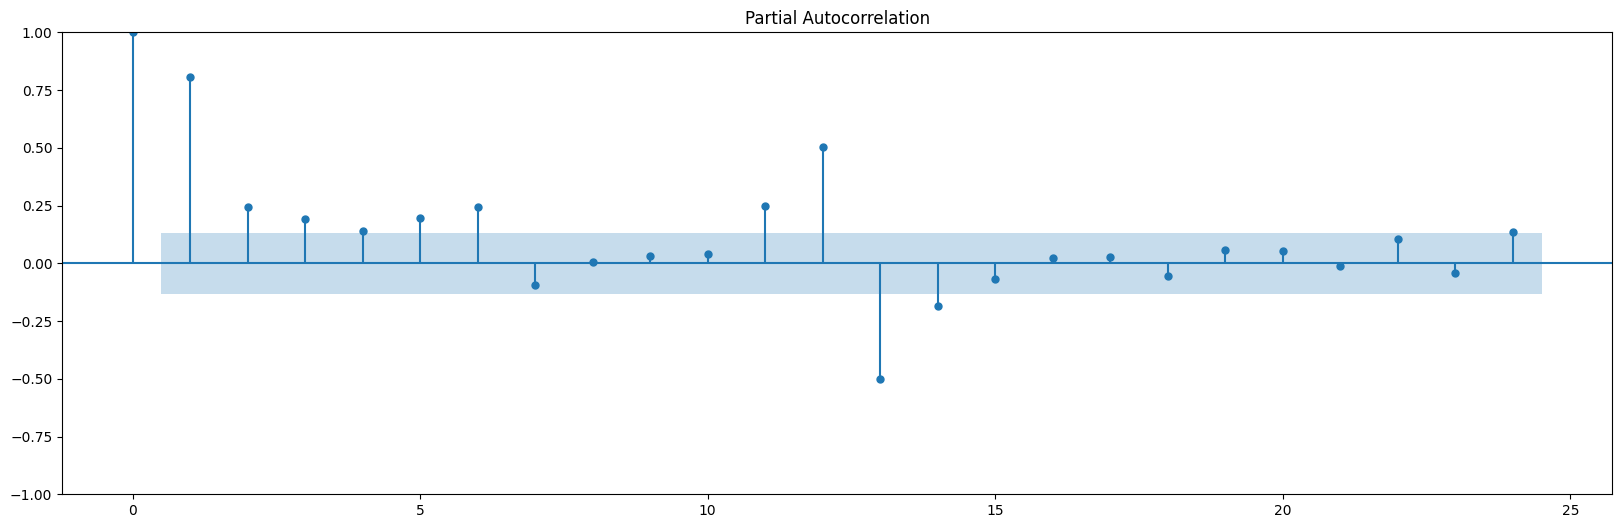

In [ ]:
plot_pacf(df.Sales)

# ARIMA Algorithm Families

## Auto Regression - AR

In [ ]:
adf_test(train_x.Sales)

Failed Reject H0: Data is not Stationary


In [ ]:
train_x_st=train_x.copy()
train_x_st.Sales=train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st)

Reject H0: Data is Stationary


In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train_x_st.Sales, order=(1,0,0))
model=model.fit(disp=False)
test_x['pred']=model.forecast(steps=12)
test_x['pred']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


DATE
2018-02-01    1462.909654
2018-03-01    -514.497705
2018-04-01     180.946163
2018-05-01     -63.637823
2018-06-01      22.381091
2018-07-01      -7.871313
2018-08-01       2.768300
2018-09-01      -0.973597
2018-10-01       0.342409
2018-11-01      -0.120423
2018-12-01       0.042352
2019-01-01      -0.014895
Name: pred, dtype: float64

In [ ]:
test_x['pred']=test_x['pred'].cumsum()+train_x.Sales[-1]

<ipython-input-65-91aaa95c270e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred']=test_x['pred'].cumsum()+train_x.Sales[-1]


MSE : 2424.183
MAE : 2191.957
MAPE : 0.149


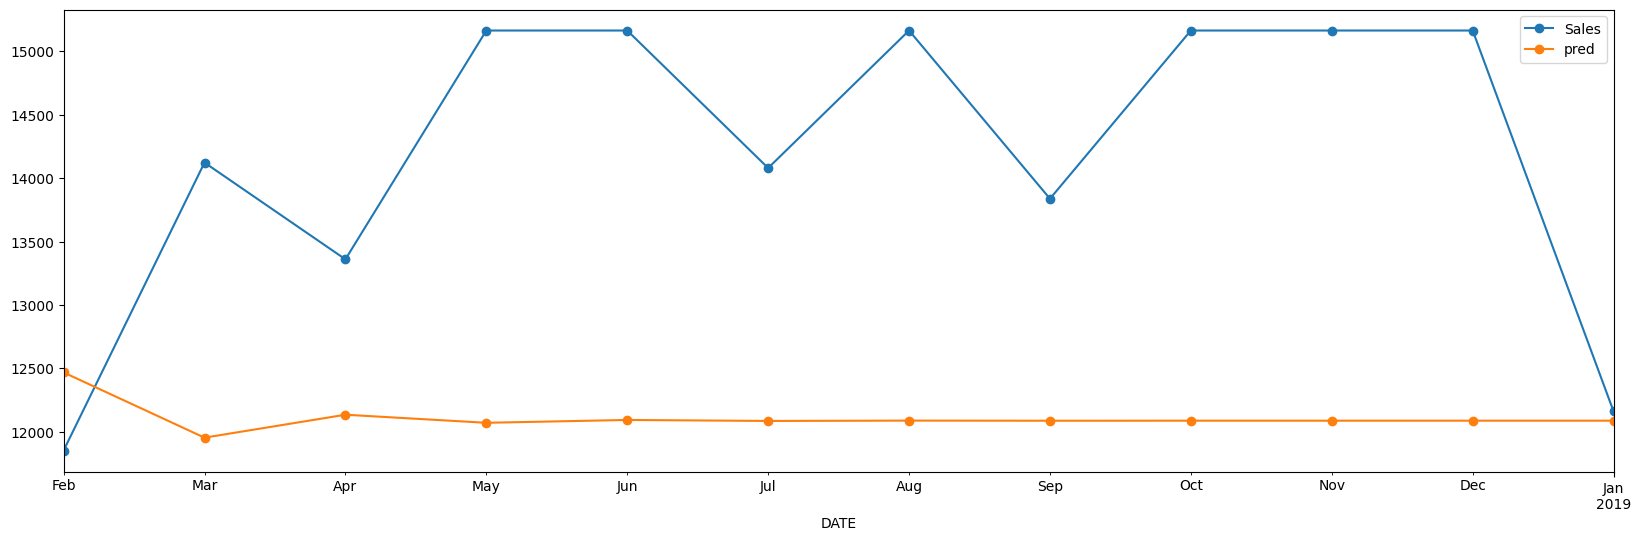

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

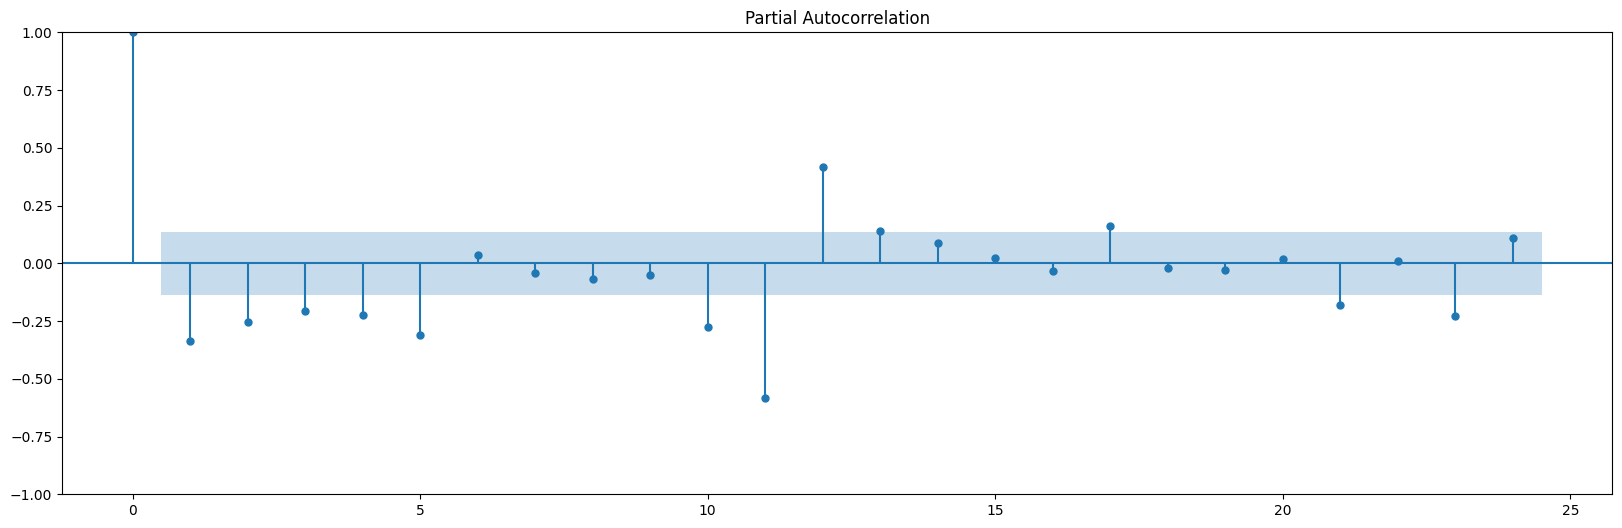

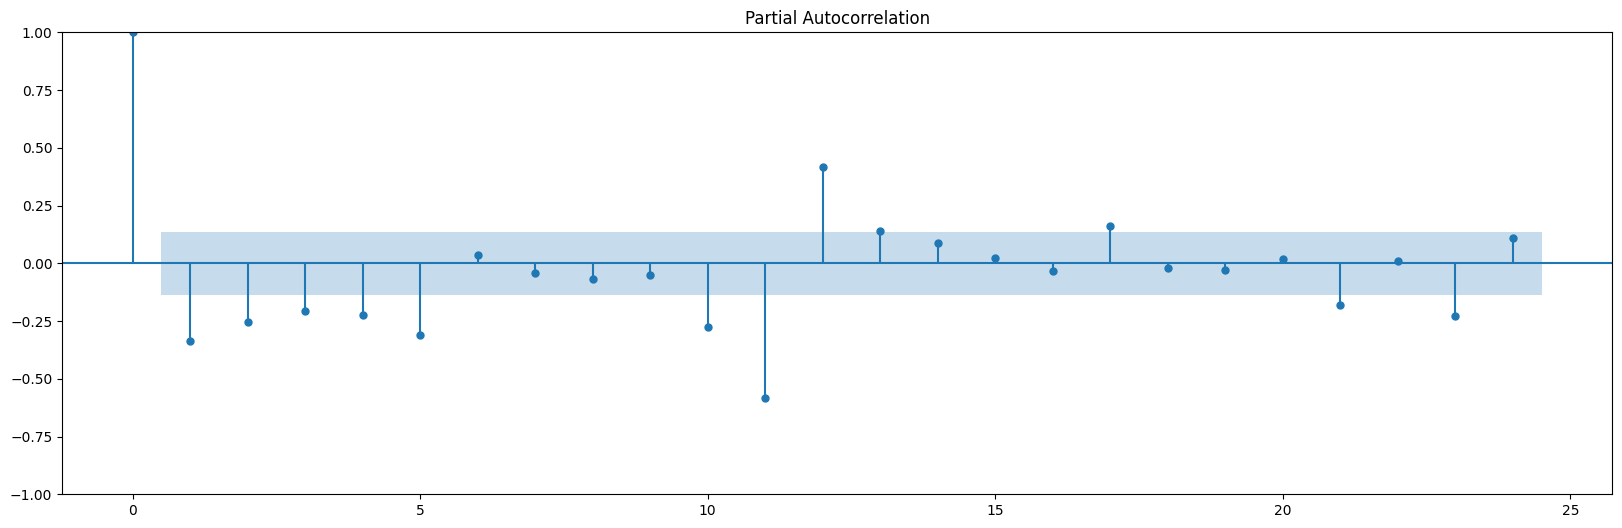

In [ ]:
plot_pacf(train_x_st.Sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-68-ddbff098a364>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred']=test_x['pred'].cumsum() +train_x.Sales[-1]


MSE : 1677.498
MAE : 1489.515
MAPE : 0.102


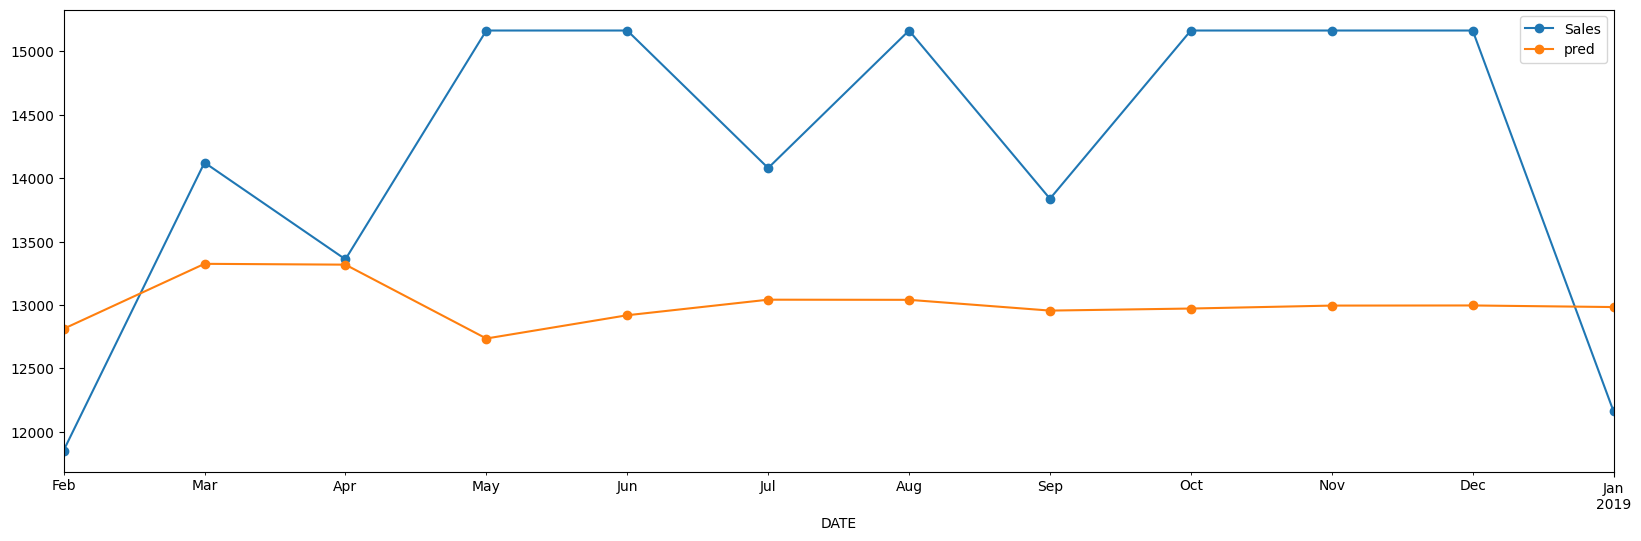

In [ ]:
model=SARIMAX(train_x_st.Sales, order=(3,0,0))
model=model.fit(disp=False)
test_x['pred']=model.forecast(steps=12)
test_x['pred']=test_x['pred'].cumsum() +train_x.Sales[-1]
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])

## Moving Averages - MA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-69-9576e97d2796>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MSE : 1288.016
MAE : 1153.09
MAPE : 0.08


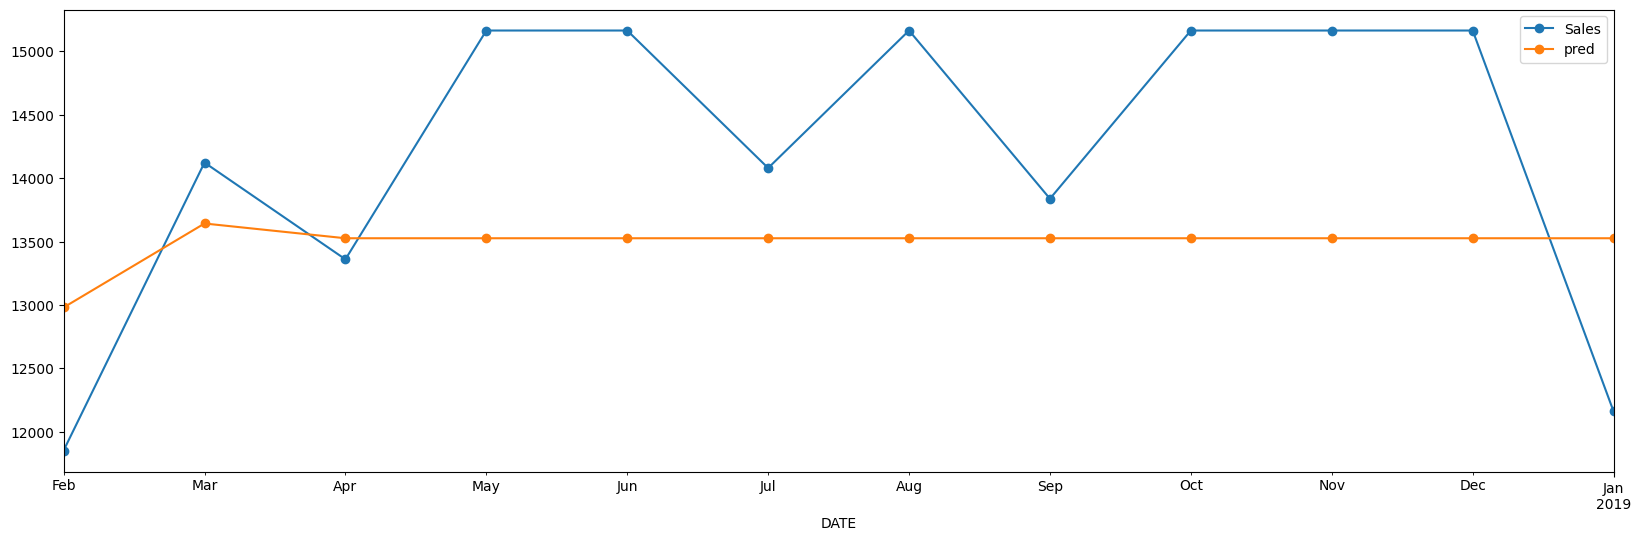

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(0, 0, 3))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## ARMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-70-a039c0d61a31>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


MSE : 1291.822
MAE : 1146.258
MAPE : 0.08


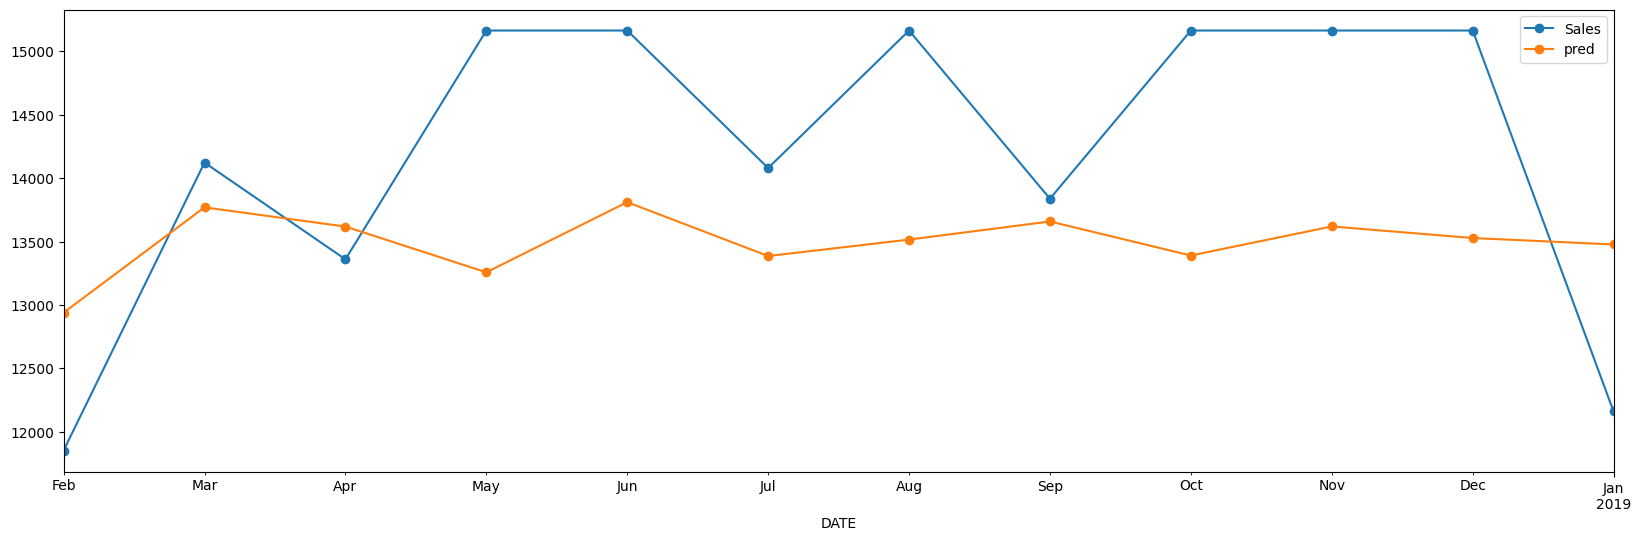

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(3, 0, 3))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)

# Integrating the trend back!
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

# Plotting
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE : 1245.907
MAE : 1133.086
MAPE : 0.079


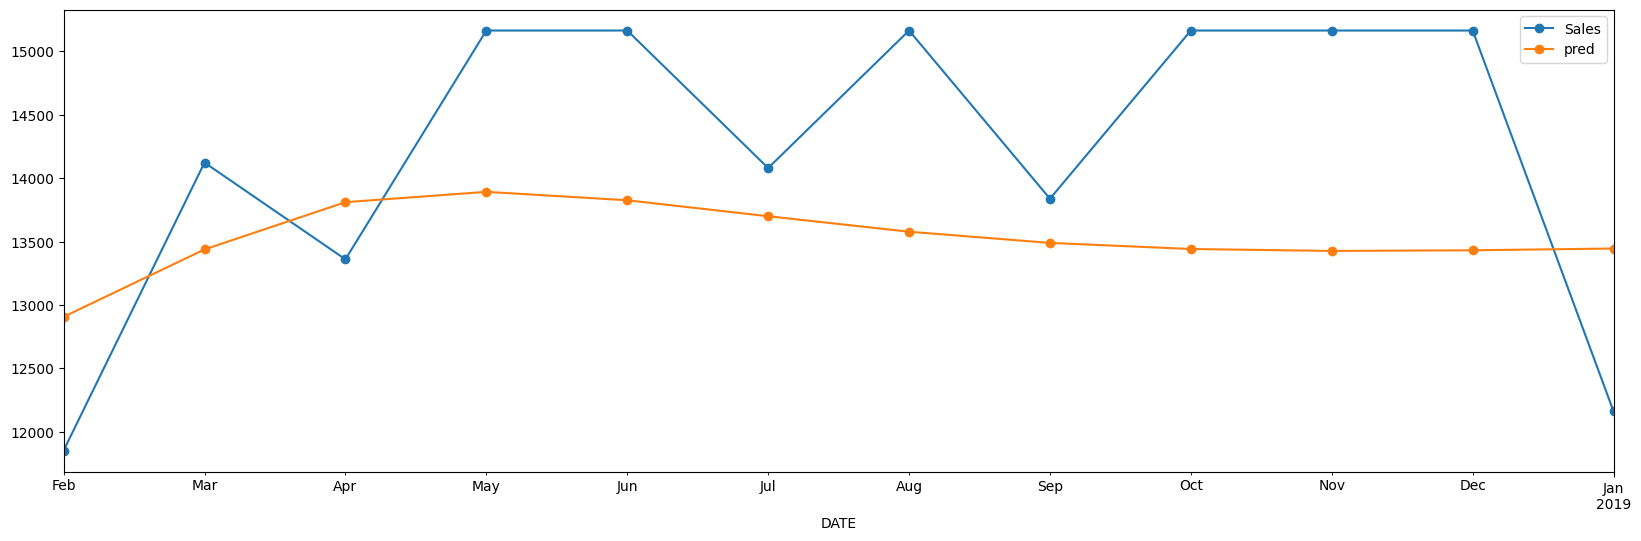

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Sales, order=(3,1,2)).fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x.Sales,test_x.pred)

## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE : 528.333
MAE : 430.418
MAPE : 0.03


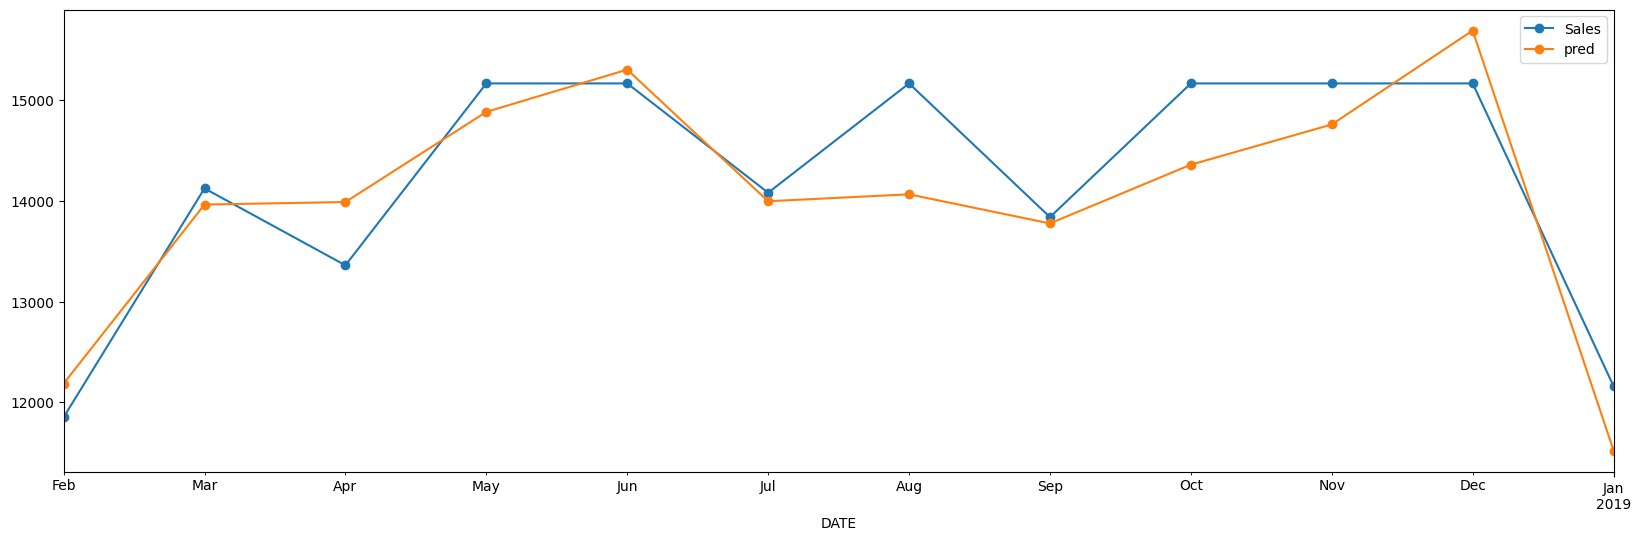

In [ ]:
model = SARIMAX(train_x.Sales, order=(3,1,3),seasonal_order=(1,1,1,12))
model=model.fit(disp=False)
test_x['pred']=model.forecast(12)
test_x.plot(style='-o')
performance(test_x.Sales,test_x.pred)

## Confidence Interval

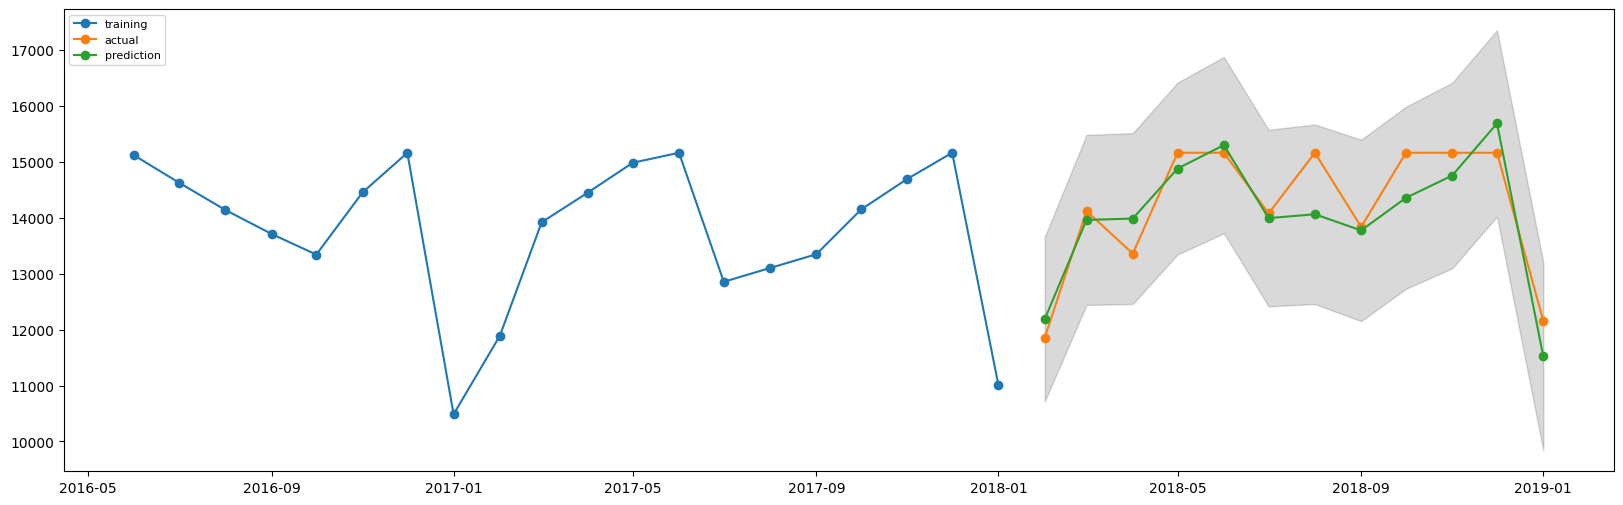

In [ ]:
test_x[['lower','upper']]=model.get_forecast(steps=12).conf_int(0.05).values
plt.plot(train_x['Sales'][-20:],'-o',label='training')
plt.plot(test_x['Sales'],'-o', label='actual')
plt.plot(test_x['pred'],'-o',label='prediction')
plt.fill_between(test_x.index,test_x['lower'],test_x['upper'],color='k',alpha=.15)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [1]:
import numpy as np